# KBOD Analysis


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading and Cleaning

In [2]:
# Load the dataset
data_path = ['broadband_data_2019November.csv','broadband_data_2020October.csv','broadband_data_zipcode.csv']
broadband_data_2019 = pd.read_csv(data_path[0])
broadband_data_2020 = pd.read_csv(data_path[1])
broadband_data_zipcode = pd.read_csv(data_path[2])

In [3]:
broadband_data_2019

ST  COUNTY_ID        COUNTY_NAME  BROADBAND_AVAILABILITY_PER_FCC   \
0     AL       1001     Autauga County                             0.81   
1     AL       1003     Baldwin County                             0.88   
2     AL       1005     Barbour County                             0.59   
3     AL       1007        Bibb County                             0.29   
4     AL       1009      Blount County                             0.69   
...   ..        ...                ...                              ...   
3138  WY      56037  Sweetwater County                             0.93   
3139  WY      56039       Teton County                             0.94   
3140  WY      56041       Uinta County                             0.66   
3141  WY      56043    Washakie County                             0.76   
3142  WY      56045      Weston County                             0.34   

      BROADBAND_USAGE   
0                 0.28  
1                  0.3  
2                 0.18  
3                 0.07  
4                 0.09  
...                ...  
3138              0.24  
3139              0.48  
3140              0.21  
3141              0.37  
3142              0.09  

[3143 rows x 5 columns]

In [4]:
broadband_data_2020

ST  COUNTY_ID        COUNTY_NAME  BROADBAND_AVAILABILITY_PER_FCC   \
0     AL       1001     Autauga County                           0.8057   
1     AL       1003     Baldwin County                           0.8362   
2     AL       1005     Barbour County                           0.6891   
3     AL       1007        Bibb County                           0.3368   
4     AL       1009      Blount County                            0.758   
...   ..        ...                ...                              ...   
3137  WY      56037  Sweetwater County                           0.9422   
3138  WY      56039       Teton County                           0.9508   
3139  WY      56041       Uinta County                           0.9963   
3140  WY      56043    Washakie County                           0.8903   
3141  WY      56045      Weston County                           0.8937   

      BROADBAND_USAGE   
0                0.391  
1                0.452  
2                0.324  
3                0.136  
4                0.199  
...                ...  
3137               0.4  
3138             0.623  
3139             0.431  
3140             0.571  
3141             0.152  

[3142 rows x 5 columns]

In [5]:
broadband_data_zipcode

ST COUNTY_NAME  COUNTY_ID  POSTAL_CODE  BROADBAND_USAGE  \
0      SC   Abbeville      45001        29639            0.948   
1      SC   Abbeville      45001        29620            0.398   
2      SC   Abbeville      45001        29659            0.206   
3      SC   Abbeville      45001        29638            0.369   
4      SC   Abbeville      45001        29628            0.221   
...    ..         ...        ...          ...              ...   
32730  TX      Zavala      48507        78839            0.514   
32731  TX      Zavala      48507        78872            0.071   
32732  SD     Ziebach      46137        57622            0.000   
32733  SD     Ziebach      46137        57748            0.000   
32734  SD     Ziebach      46137        57623            0.299   

       ERROR_RANGE_(MAE)(+/-)  ERROR_RANGE_(95%)(+/-)    MSD  
0                       0.034                   0.110  0.002  
1                       0.002                   0.007  0.000  
2                       0.152                   0.608  0.043  
3                       0.010                   0.031 -0.001  
4                       0.014                   0.043  0.000  
...                       ...                     ...    ...  
32730                   0.006                   0.018 -0.001  
32731                   0.020                   0.061  0.000  
32732                   0.110                   0.406  0.031  
32733                   0.065                   0.228  0.013  
32734                   0.034                   0.110  0.002  

[32735 rows x 8 columns]

In [6]:
# Check for missing values in each dataset
missing_values_2019 = broadband_data_2019.isnull().sum()
missing_values_2020 = broadband_data_2020.isnull().sum()
missing_values_zipcode = broadband_data_zipcode.isnull().sum()

# Check data types of each dataset
data_types_2019 = broadband_data_2019.dtypes
data_types_2020 = broadband_data_2020.dtypes
data_types_zipcode = broadband_data_zipcode.dtypes

(missing_values_2019, data_types_2019, missing_values_2020, data_types_2020, missing_values_zipcode, data_types_zipcode)


(ST                                  0
 COUNTY_ID                           0
 COUNTY_NAME                         0
  BROADBAND_AVAILABILITY_PER_FCC     0
  BROADBAND_USAGE                    0
 dtype: int64,
 ST                                  object
 COUNTY_ID                            int64
 COUNTY_NAME                         object
  BROADBAND_AVAILABILITY_PER_FCC     object
  BROADBAND_USAGE                    object
 dtype: object,
 ST                                  0
 COUNTY_ID                           0
 COUNTY_NAME                         0
  BROADBAND_AVAILABILITY_PER_FCC     0
  BROADBAND_USAGE                    0
 dtype: int64,
 ST                                  object
 COUNTY_ID                            int64
 COUNTY_NAME                         object
  BROADBAND_AVAILABILITY_PER_FCC     object
  BROADBAND_USAGE                    object
 dtype: object,
 ST                        0
 COUNTY_NAME               0
 COUNTY_ID                 0
 POSTAL_CODE         

In [7]:
broadband_data_2019.duplicated().sum()

0

In [8]:
broadband_data_2020.duplicated().sum()

0

The checks reveal:

- There are no missing values in any of the datasets, which is excellent for data analysis.
- The data types for the columns related to broadband availability and usage in the 2019 and 2020 datasets are objects instead of numerical values, which may indicate that they contain non-numeric characters or are not formatted correctly for numerical analysis. These will need to be converted to a numeric type.

Before we can proceed with visualization, we need to address the issue with the data types. We will convert the `BROADBAND_AVAILABILITY_PER_FCC` and `BROADBAND_USAGE` columns in the 2019 and 2020 datasets from object to float to ensure accurate numerical analysis.


In [9]:
# Correcting the column names based on the dataframe headers and attempting the conversion again

# For 2019 data
broadband_data_2019.columns = broadband_data_2019.columns.str.strip()  # Removing any leading/trailing spaces
broadband_data_2019['BROADBAND_AVAILABILITY_PER_FCC'] = pd.to_numeric(broadband_data_2019['BROADBAND_AVAILABILITY_PER_FCC'], errors='coerce')
broadband_data_2019['BROADBAND_USAGE'] = pd.to_numeric(broadband_data_2019['BROADBAND_USAGE'], errors='coerce')

# For 2020 data
broadband_data_2020.columns = broadband_data_2020.columns.str.strip()  # Removing any leading/trailing spaces
broadband_data_2020['BROADBAND_AVAILABILITY_PER_FCC'] = pd.to_numeric(broadband_data_2020['BROADBAND_AVAILABILITY_PER_FCC'], errors='coerce')
broadband_data_2020['BROADBAND_USAGE'] = pd.to_numeric(broadband_data_2020['BROADBAND_USAGE'], errors='coerce')

# Check for any NaN values that were created due to conversion issues and the data types again
nan_values_2019 = broadband_data_2019.isnull().sum()
nan_values_2020 = broadband_data_2020.isnull().sum()

(nan_values_2019, broadband_data_2019.dtypes, nan_values_2020, broadband_data_2020.dtypes)


(ST                                 0
 COUNTY_ID                          0
 COUNTY_NAME                        0
 BROADBAND_AVAILABILITY_PER_FCC    32
 BROADBAND_USAGE                    9
 dtype: int64,
 ST                                 object
 COUNTY_ID                           int64
 COUNTY_NAME                        object
 BROADBAND_AVAILABILITY_PER_FCC    float64
 BROADBAND_USAGE                   float64
 dtype: object,
 ST                                 0
 COUNTY_ID                          0
 COUNTY_NAME                        0
 BROADBAND_AVAILABILITY_PER_FCC     9
 BROADBAND_USAGE                   11
 dtype: int64,
 ST                                 object
 COUNTY_ID                           int64
 COUNTY_NAME                        object
 BROADBAND_AVAILABILITY_PER_FCC    float64
 BROADBAND_USAGE                   float64
 dtype: object)

The conversion to numeric types was successful, but it has revealed that there are some NaN values in the `BROADBAND_AVAILABILITY_PER_FCC` and `BROADBAND_USAGE` columns for both the 2019 and 2020 datasets. Specifically, there are:

- 32 NaN values in `BROADBAND_AVAILABILITY_PER_FCC` and 9 NaN values in `BROADBAND_USAGE` for the 2019 dataset.
- 9 NaN values in `BROADBAND_AVAILABILITY_PER_FCC` and 11 NaN values in `BROADBAND_USAGE` for the 2020 dataset.

These NaNs may have resulted from non-numeric data that couldn't be converted to floats. We can address these NaN values by filling them with  the mean of the column. 


In [10]:
# Fill NaN values with the mean of the respective columns

broadband_data_2019['BROADBAND_AVAILABILITY_PER_FCC'].fillna(broadband_data_2019['BROADBAND_AVAILABILITY_PER_FCC'].mean(), inplace=True)
broadband_data_2019['BROADBAND_USAGE'].fillna(broadband_data_2019['BROADBAND_USAGE'].mean(), inplace=True)

broadband_data_2020['BROADBAND_AVAILABILITY_PER_FCC'].fillna(broadband_data_2020['BROADBAND_AVAILABILITY_PER_FCC'].mean(), inplace=True)
broadband_data_2020['BROADBAND_USAGE'].fillna(broadband_data_2020['BROADBAND_USAGE'].mean(), inplace=True)

# Check again for NaN values to ensure they have been filled
nan_values_2019_filled = broadband_data_2019.isnull().sum()
nan_values_2020_filled = broadband_data_2020.isnull().sum()

(nan_values_2019_filled, nan_values_2020_filled)


(ST                                0
 COUNTY_ID                         0
 COUNTY_NAME                       0
 BROADBAND_AVAILABILITY_PER_FCC    0
 BROADBAND_USAGE                   0
 dtype: int64,
 ST                                0
 COUNTY_ID                         0
 COUNTY_NAME                       0
 BROADBAND_AVAILABILITY_PER_FCC    0
 BROADBAND_USAGE                   0
 dtype: int64)

### Data Integration

In [11]:
# Before integrating, we need to ensure that the COUNTY_IDs are consistent across both datasets for proper alignment.
# We will perform a merge operation to integrate the datasets based on the COUNTY_ID and ST (state) columns.

# Merging the datasets on 'ST' and 'COUNTY_ID' which are common in both datasets
combined_data = pd.merge(
    broadband_data_2019[['ST', 'COUNTY_ID', 'BROADBAND_AVAILABILITY_PER_FCC', 'BROADBAND_USAGE']],
    broadband_data_2020[['ST', 'COUNTY_ID', 'BROADBAND_AVAILABILITY_PER_FCC', 'BROADBAND_USAGE']],
    on=['ST', 'COUNTY_ID'],
    suffixes=('_2019', '_2020')
)

# Display the first few rows of the combined dataframe to verify the merge
combined_data.head()


ST  COUNTY_ID  BROADBAND_AVAILABILITY_PER_FCC_2019  BROADBAND_USAGE_2019  \
0  AL       1001                                 0.81                  0.28   
1  AL       1003                                 0.88                  0.30   
2  AL       1005                                 0.59                  0.18   
3  AL       1007                                 0.29                  0.07   
4  AL       1009                                 0.69                  0.09   

   BROADBAND_AVAILABILITY_PER_FCC_2020  BROADBAND_USAGE_2020  
0                               0.8057                 0.391  
1                               0.8362                 0.452  
2                               0.6891                 0.324  
3                               0.3368                 0.136  
4                               0.7580                 0.199

The data from 2019 and 2020 has been successfully integrated into a combined dataset, which now includes broadband availability and usage for both years, allowing us to analyze changes over time.

The next step is Step 3: Data Analysis and Visualization. We will create several visualizations:

1. **Line charts** showing the trend of broadband availability and usage over time for Kansas and possibly comparing it to other states.
2. **Choropleth maps** to display broadband usage across different counties in Kansas.
3. **Bar charts** or **box plots** to compare broadband availability and usage between Kansas and other states.
4. **Histograms** or **box plots** to visualize the distribution of broadband usage within Kansas.


In [12]:
combined_data['BROADBAND_USAGE_2020'].max()

1.0

## EDA

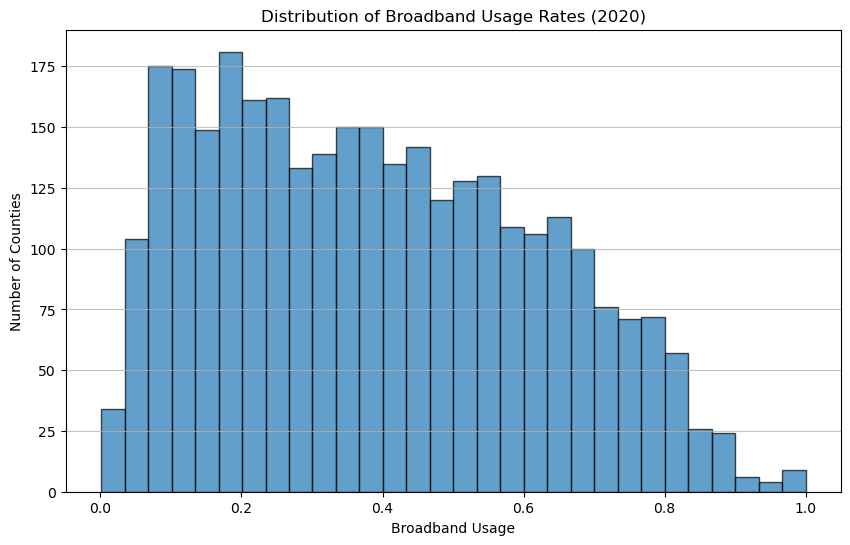

In [13]:
# Histogram of Broadband Usage for all counties in the dataset (2020 data)
plt.figure(figsize=(10, 6))
plt.hist(combined_data['BROADBAND_USAGE_2020'], bins=30,  edgecolor='black', alpha=0.7)
plt.title('Distribution of Broadband Usage Rates (2020)')
plt.xlabel('Broadband Usage')
plt.ylabel('Number of Counties')
plt.grid(axis='y', alpha=0.75)

plt.show()


The histogram above displays the distribution of broadband usage rates across counties in 2020.

#### Analysis:

- **Distribution Shape:** The distribution of broadband usage rates appears to be somewhat right skewed, with a higher concentration of counties having lower usage rates. This suggests that while some areas have high broadband adoption, a significant number of counties experience lower usage levels.

- **Variability:** The spread of the histogram indicates variability in broadband usage across different counties. Some counties have very high usage rates, potentially reflecting urban areas with better access to broadband and higher digital literacy levels.
- **Potential Areas for Improvement:** The left side of the histogram, which shows counties with lower broadband usage rates, highlights areas where there may be significant room for improvement in terms of broadband adoption.

This visualization provides insights into the broadband usage landscape, emphasizing the need for targeted efforts in counties with lower usage rates to ensure equitable access to and utilization of broadband services.

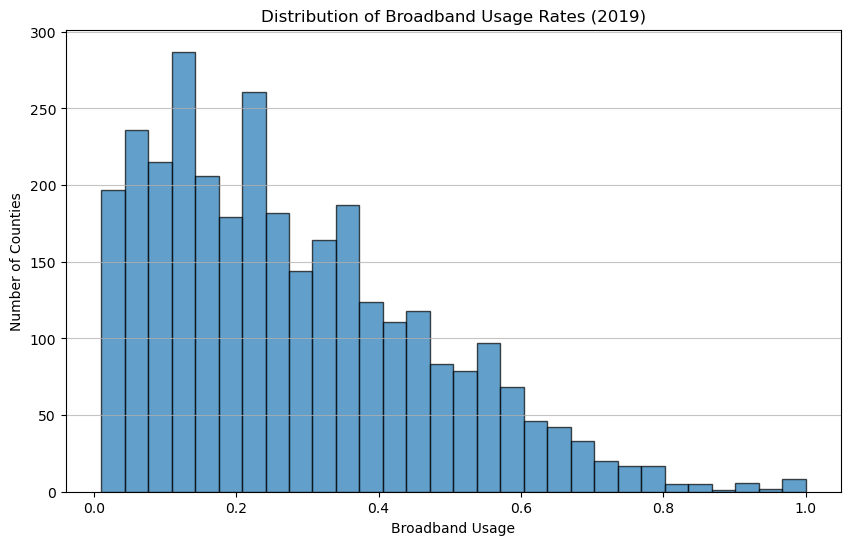

In [14]:
# Histogram of Broadband Usage for all counties in the dataset (2019 data)
plt.figure(figsize=(10, 6))
plt.hist(combined_data['BROADBAND_USAGE_2019'], bins=30,  edgecolor='black', alpha=0.7)
plt.title('Distribution of Broadband Usage Rates (2019)')
plt.xlabel('Broadband Usage')
plt.ylabel('Number of Counties')
plt.grid(axis='y', alpha=0.75)
plt.show()


Analysis:

- **Distribution Shape**: The histogram shows a distribution of broadband usage rates that is right skewed towards lower rates, with a notable peak in the lower rate intervals. The height of the bars indicates that a significant portion of counties have broadband usage rates between approximately 10% and 30%.

- **Variability**: There is considerable variability in broadband usage across the counties, as seen by the range of bar heights across different usage rate intervals. The presence of counties across the entire spectrum of usage rates indicates a diverse set of environments with regard to broadband access or adoption.

- **Potential Areas for Improvement**: The substantial number of counties represented by the taller bars on the left-hand side of the histogram (lower usage rates) suggests a potential focus area for broadband development. Counties within the lower usage rate intervals could be targeted for increased infrastructure investment, policy intervention, and adoption programs.


In [15]:
combined_data['BROADBAND_USAGE_2020']

0       0.391
1       0.452
2       0.324
3       0.136
4       0.199
        ...  
3135    0.400
3136    0.623
3137    0.431
3138    0.571
3139    0.152
Name: BROADBAND_USAGE_2020, Length: 3140, dtype: float64

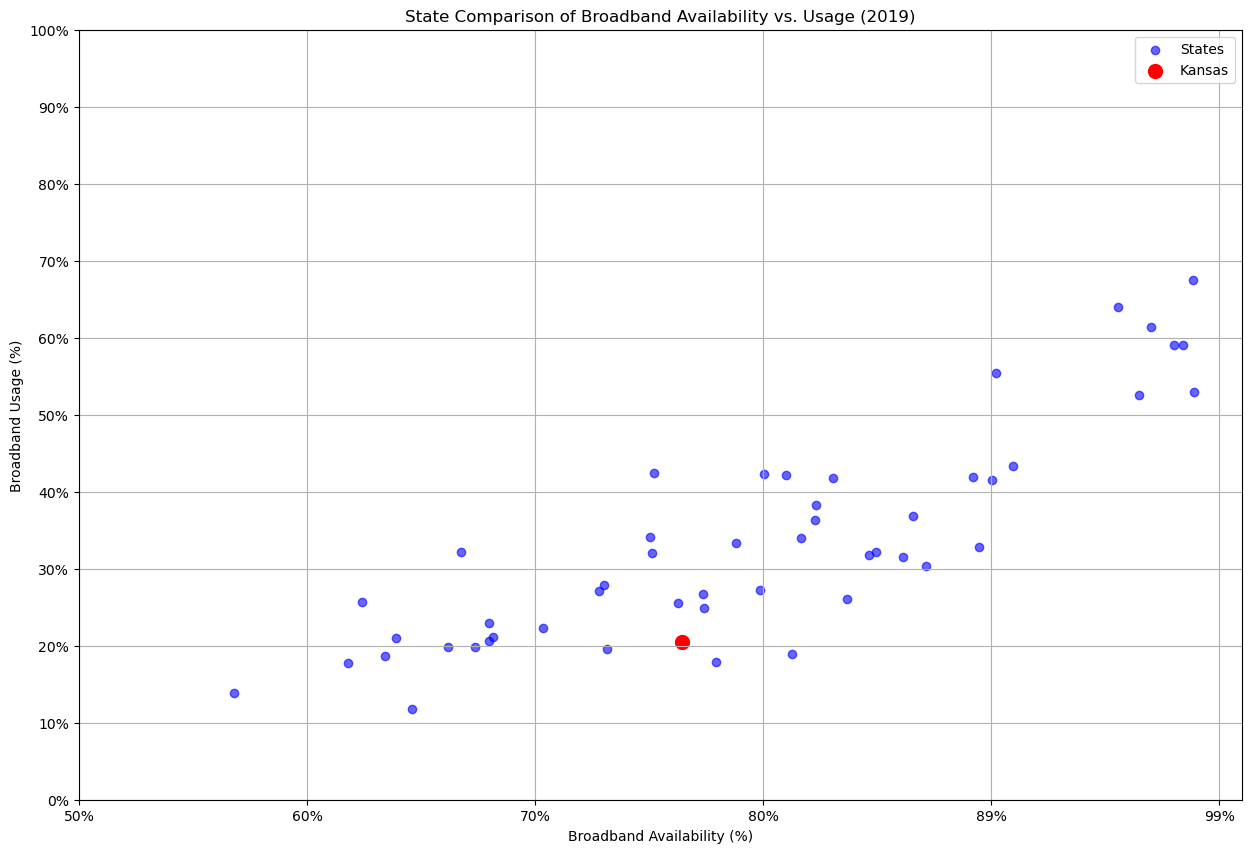

In [16]:
# Creating a scatter plot to compare broadband availability and usage among states in 2019
# Calculating the average broadband availability and usage for each state for both 2019 and 2020
state_averages = combined_data.groupby('ST')[['BROADBAND_AVAILABILITY_PER_FCC_2019', 'BROADBAND_USAGE_2019', 'BROADBAND_AVAILABILITY_PER_FCC_2020', 'BROADBAND_USAGE_2020']].mean()
# Kansas's average for comparison
ks_average = state_averages.loc['KS']

plt.figure(figsize=(15, 10))

# Plotting all states for 2019
plt.scatter(state_averages['BROADBAND_AVAILABILITY_PER_FCC_2019'], state_averages['BROADBAND_USAGE_2019'], color='blue', alpha=0.6, label='States')

# Highlighting Kansas for 2019
plt.scatter(ks_average['BROADBAND_AVAILABILITY_PER_FCC_2019'], ks_average['BROADBAND_USAGE_2019'], color='red', s=100, label='Kansas')

plt.title('State Comparison of Broadband Availability vs. Usage (2019)')
plt.xlabel('Broadband Availability (%)')
plt.ylabel('Broadband Usage (%)')
# Adjust x-axis labels to show percentages
plt.xticks(ticks=np.arange(0.5, 1.01, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0.5, 1.01, 0.1)])
# Adjust y-axis labels to show percentages
plt.yticks(ticks=np.arange(0, 1.1, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)])
plt.legend()
plt.grid(True)

plt.show()


The scatter plot above illustrates the comparison of broadband availability to usage among all states in 2019, with Kansas specifically highlighted. Similar to the 2020 analysis, this visualization offers insight into where Kansas stood relative to other states in terms of both broadband availability and usage at the onset of the analyzed period.

### Key Insights for 2019:
- **Kansas's Positioning:** In 2019, Kansas's position, indicated by the red marker, shows its broadband availability and usage relative to other states. Like the 2020 data, Kansas appears to be within the middle range of states in terms of both metrics.
- **Nationwide Trends:** The plot suggests a positive correlation between broadband availability and usage across states, underscoring the importance of access as a driver of digital engagement.



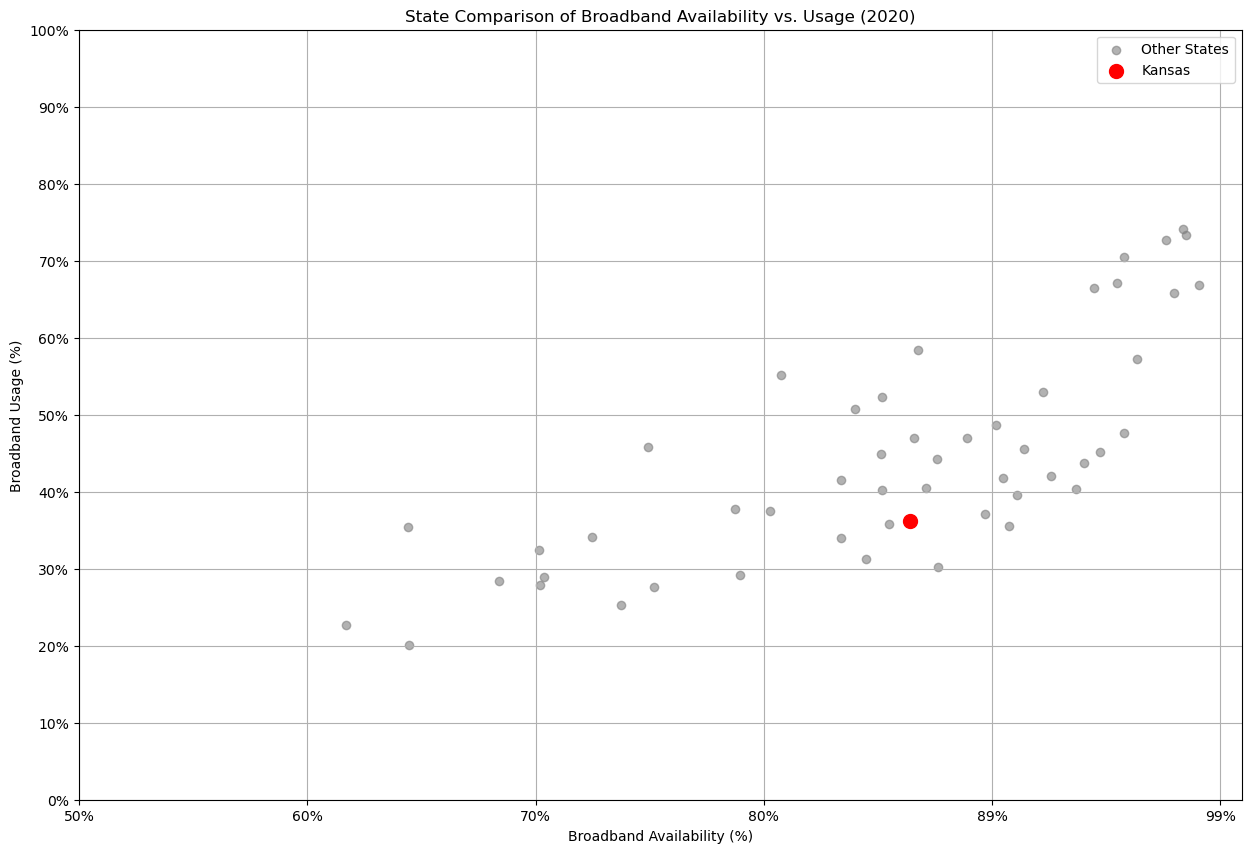

In [17]:
# Creating a scatter plot to compare broadband availability and usage among states in 2020

plt.figure(figsize=(15, 10))

# Plotting all states
plt.scatter(state_averages['BROADBAND_AVAILABILITY_PER_FCC_2020'], state_averages['BROADBAND_USAGE_2020'], color='gray', alpha=0.6, label='Other States')

# Highlighting Kansas
plt.scatter(ks_average['BROADBAND_AVAILABILITY_PER_FCC_2020'], ks_average['BROADBAND_USAGE_2020'], color='red', s=100, label='Kansas')

plt.title('State Comparison of Broadband Availability vs. Usage (2020)')
plt.xlabel('Broadband Availability (%)')
plt.ylabel('Broadband Usage (%)')
# Adjust x-axis labels to show percentages
plt.xticks(ticks=np.arange(0.5, 1.01, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0.5, 1.01, 0.1)])
# Adjust y-axis labels to show percentages
plt.yticks(ticks=np.arange(0, 1.1, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)])
plt.legend()
plt.grid(True)

plt.show()


The scatter plot above compares broadband availability to usage for all states in 2020, with Kansas highlighted in red. This visualization helps to understand where Kansas stands relative to other states regarding these metrics.

### Observations:
- **Kansas's Position:** Kansas is positioned well within the mix of states, showing a balanced improvement in both availability and usage. The red marker indicates Kansas's specific location based on the 2020 data.
- **General Trend:** There seems to be a positive correlation between broadband availability and usage among states, which is expected. States with higher availability typically have higher usage rates.

### Conclusion:
Kansas has made noticeable progress in increasing both broadband availability and usage, as indicated by its position in the scatter plot. While there's room for improvement to reach the top-tier states, the year-over-year progress is commendable.


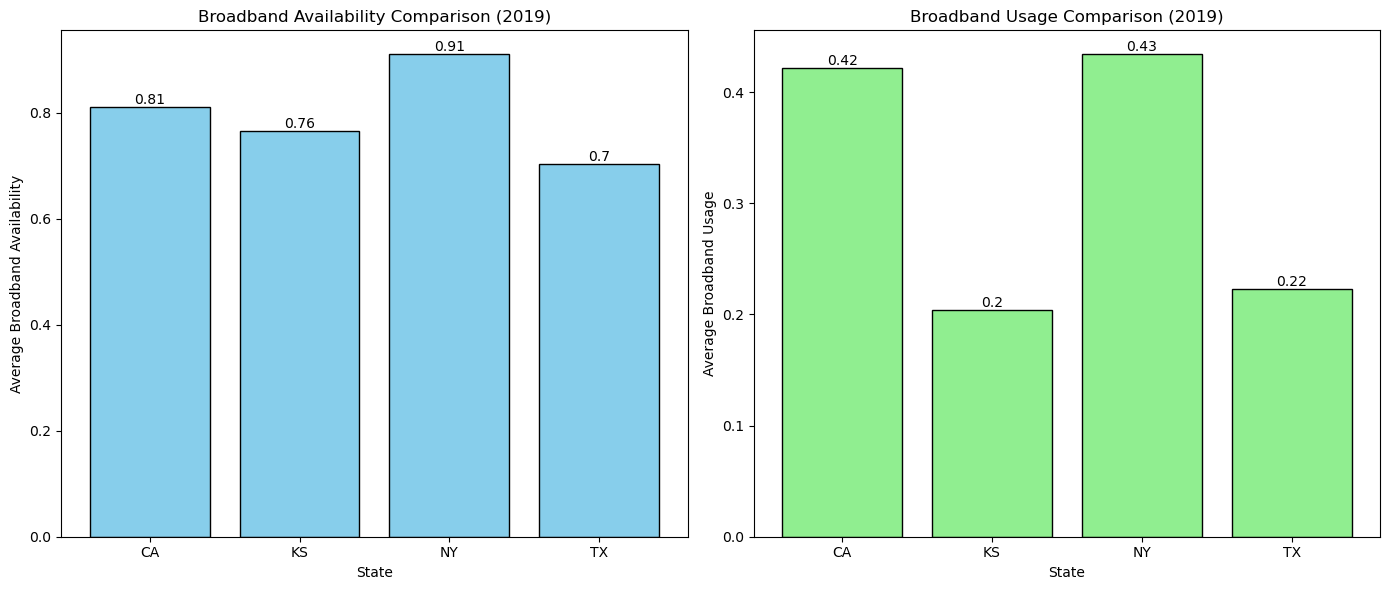

In [18]:

# Selecting a few states for comparison
states_to_compare = ['KS', 'CA', 'NY', 'TX']


# Filtering the combined data for the selected states and calculating the mean for 2020 data
state_comparison_data = combined_data[combined_data['ST'].isin(states_to_compare)]
state_availability_means_2019 = state_comparison_data.groupby('ST')['BROADBAND_AVAILABILITY_PER_FCC_2019'].mean()
state_usage_means_2019 = state_comparison_data.groupby('ST')['BROADBAND_USAGE_2019'].mean()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Broadband Availability Comparison with Data Labels
availability_bars = ax[0].bar(state_availability_means_2019.index, state_availability_means_2019.values, color='skyblue', edgecolor='black')
ax[0].set_title('Broadband Availability Comparison (2019)')
ax[0].set_ylabel('Average Broadband Availability')
ax[0].set_xlabel('State')
# Adding data labels
for bar in availability_bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Broadband Usage Comparison with Data Labels
usage_bars = ax[1].bar(state_usage_means_2019.index, state_usage_means_2019.values, color='lightgreen', edgecolor='black')
ax[1].set_title('Broadband Usage Comparison (2019)')
ax[1].set_ylabel('Average Broadband Usage')
ax[1].set_xlabel('State')
# Adding data labels
for bar in usage_bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()



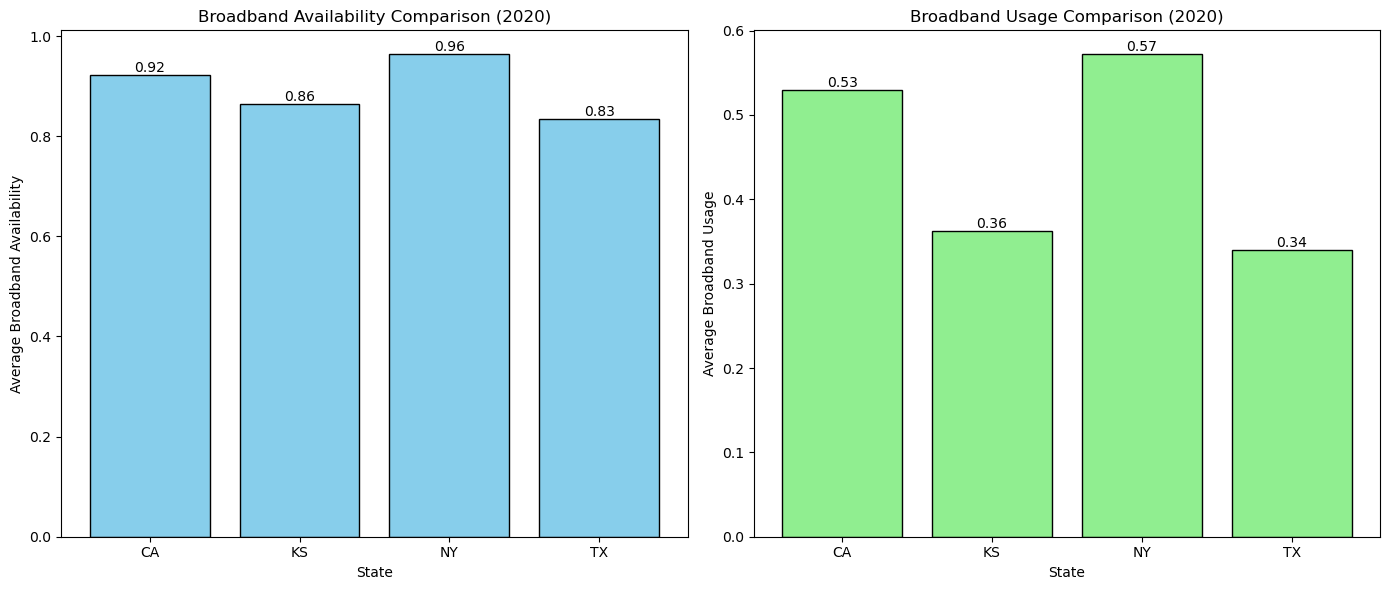

In [19]:

# Selecting a few states for comparison
states_to_compare = ['KS', 'CA', 'NY', 'TX']

# Filtering the combined data for the selected states and calculating the mean for 2020 data
state_comparison_data = combined_data[combined_data['ST'].isin(states_to_compare)]
state_availability_means = state_comparison_data.groupby('ST')['BROADBAND_AVAILABILITY_PER_FCC_2020'].mean()
state_usage_means = state_comparison_data.groupby('ST')['BROADBAND_USAGE_2020'].mean()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Broadband Availability Comparison with Data Labels
availability_bars = ax[0].bar(state_availability_means.index, state_availability_means.values, color='skyblue', edgecolor='black')
ax[0].set_title('Broadband Availability Comparison (2020)')
ax[0].set_ylabel('Average Broadband Availability')
ax[0].set_xlabel('State')
# Adding data labels
for bar in availability_bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Broadband Usage Comparison with Data Labels
usage_bars = ax[1].bar(state_usage_means.index, state_usage_means.values, color='lightgreen', edgecolor='black')
ax[1].set_title('Broadband Usage Comparison (2020)')
ax[1].set_ylabel('Average Broadband Usage')
ax[1].set_xlabel('State')
# Adding data labels
for bar in usage_bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()



The bar charts above compare the average broadband availability and usage across four states, including Kansas (KS), for the year 2020. 

### Analysis:
- **Broadband Availability Comparison**: The first chart shows how Kansas compares with California (CA), New York (NY), and Texas (TX) in terms of broadband availability. This metric indicates the percentage of the population that has access to broadband services, reflecting the infrastructure in place.
  
- **Broadband Usage Comparison**: The second chart focuses on broadband usage, which reflects the percentage of the population actually utilizing broadband services. This metric is influenced by factors such as affordability, digital literacy, and the perceived value of internet services.

### Insights:
- The charts can provide insights into how Kansas stands in terms of both broadband infrastructure (availability) and the effectiveness of its utilization (usage) compared to other states. 
- If Kansas's bars are lower than those of other states, it might indicate areas for improvement in terms of infrastructure development and initiatives aimed at increasing broadband adoption.
- Conversely, if Kansas compares favorably, it may highlight successful policies or conditions that facilitate broadband access and adoption.


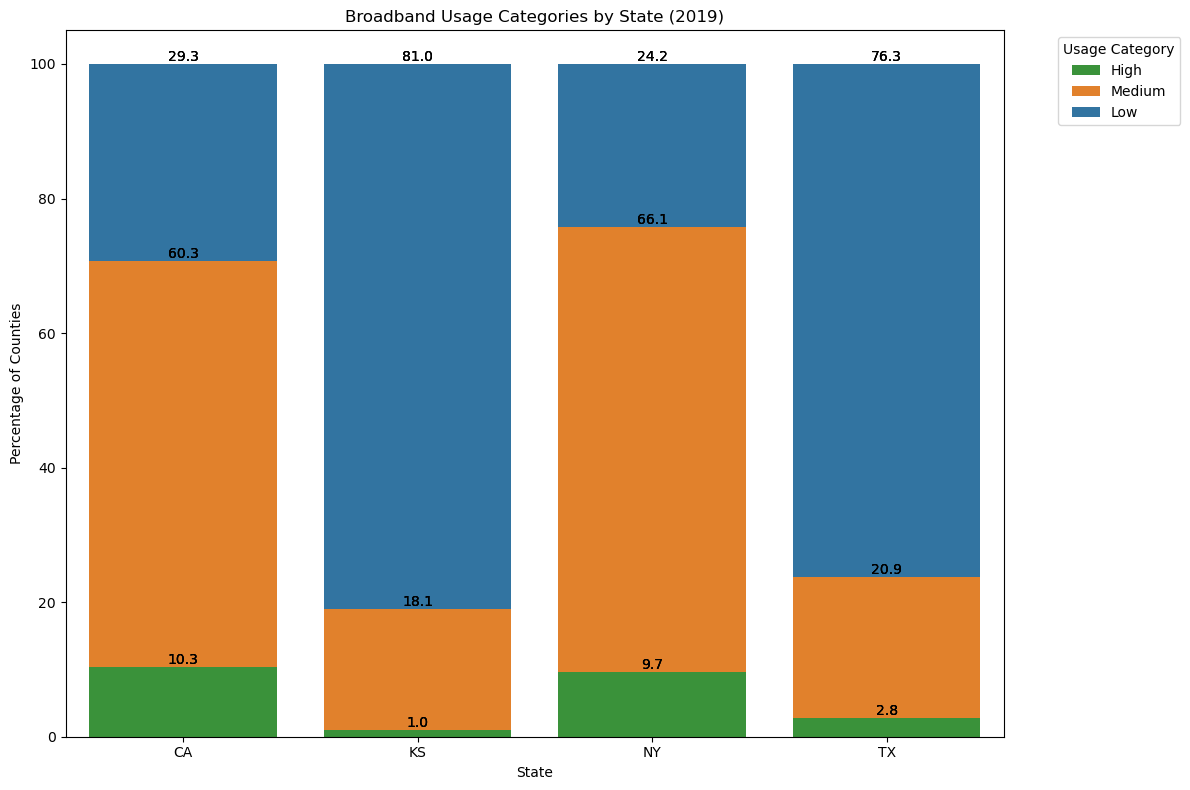

In [20]:
# Categorizing broadband usage into low, medium, and high for the selected states

usage_categories = ['Low', 'Medium', 'High']
state_usage_categorized_2019 = state_comparison_data.copy()
state_usage_categorized_2019['Usage Category'] = pd.cut(state_usage_categorized_2019['BROADBAND_USAGE_2019'], bins=[0, 0.33, 0.66, 1], labels=usage_categories, right=False)

# Calculating the percentage of each category within each state
state_usage_percentage = state_usage_categorized_2019.groupby(['ST', 'Usage Category']).size().unstack(fill_value=0).apply(lambda x: x/x.sum()*100, axis=1)


# Plot stacked bar chart and add data labels
plt.figure(figsize=(12, 8))
bars_high = sns.barplot(data=state_usage_percentage.reset_index(), x='ST', y='High', color='tab:green', label='High', errorbar=None)
bars_medium = sns.barplot(data=state_usage_percentage.reset_index(), x='ST', y='Medium', color='tab:orange', label='Medium', errorbar=None, 
                          bottom=state_usage_percentage['High'])
bars_low = sns.barplot(data=state_usage_percentage.reset_index(), x='ST', y='Low', color='tab:blue', label='Low', errorbar=None, 
                       bottom=state_usage_percentage['High'] + state_usage_percentage['Medium'])

# Add data labels for each bar segment
for bars in [bars_high, bars_medium, bars_low]:
    for bar in bars.patches:
        # Calculate the label position
        label_position = bar.get_height() + bar.get_y()
        # Create the label with the rounded percentage value
        plt.text(bar.get_x() + bar.get_width() / 2., label_position, f'{bar.get_height():.1f}',
                 ha='center', va='bottom')

plt.title('Broadband Usage Categories by State (2019)')
plt.xlabel('State')
plt.ylabel('Percentage of Counties')
plt.legend(title='Usage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

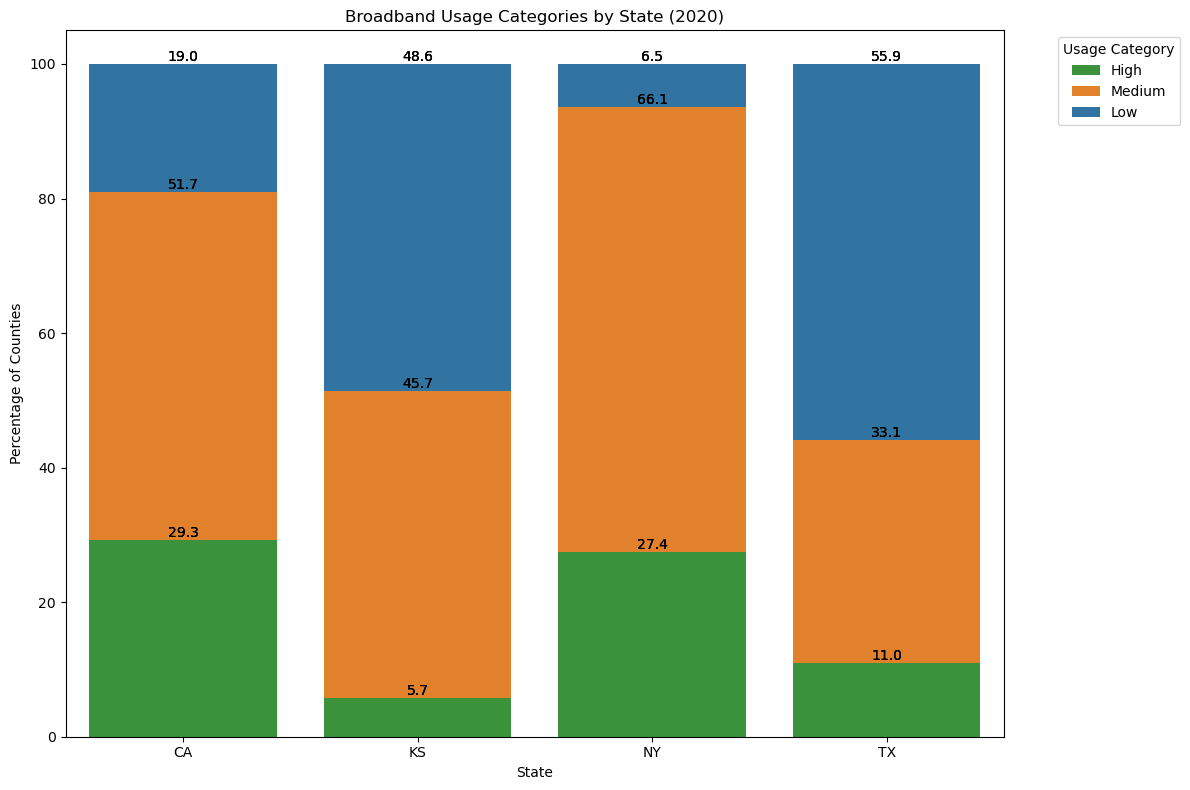

In [21]:
# Categorizing broadband usage into low, medium, and high for the selected states

usage_categories = ['Low', 'Medium', 'High']
state_usage_categorized = state_comparison_data.copy()
state_usage_categorized['Usage Category'] = pd.cut(state_usage_categorized['BROADBAND_USAGE_2020'], bins=[0, 0.33, 0.66, 1], labels=usage_categories, right=False)

# Calculating the percentage of each category within each state
state_usage_percentage = state_usage_categorized.groupby(['ST', 'Usage Category']).size().unstack(fill_value=0).apply(lambda x: x/x.sum()*100, axis=1)


# Plot stacked bar chart and add data labels
plt.figure(figsize=(12, 8))
bars_high = sns.barplot(data=state_usage_percentage.reset_index(), x='ST', y='High', color='tab:green', label='High', errorbar=None)
bars_medium = sns.barplot(data=state_usage_percentage.reset_index(), x='ST', y='Medium', color='tab:orange', label='Medium', errorbar=None, 
                          bottom=state_usage_percentage['High'])
bars_low = sns.barplot(data=state_usage_percentage.reset_index(), x='ST', y='Low', color='tab:blue', label='Low', errorbar=None, 
                       bottom=state_usage_percentage['High'] + state_usage_percentage['Medium'])

# Add data labels for each bar segment
for bars in [bars_high, bars_medium, bars_low]:
    for bar in bars.patches:
        # Calculate the label position
        label_position = bar.get_height() + bar.get_y()
        # Create the label with the rounded percentage value
        plt.text(bar.get_x() + bar.get_width() / 2., label_position, f'{bar.get_height():.1f}',
                 ha='center', va='bottom')

plt.title('Broadband Usage Categories by State (2020)')
plt.xlabel('State')
plt.ylabel('Percentage of Counties')
plt.legend(title='Usage Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Starting with the **Stacked 100% Bar Chart for Broadband Usage**, let's categorize broadband usage into three categories: low (0-33%), medium (34-66%), and high (67-100%), and compare these categories across a selection of states.


The stacked 100% bar chart above displays the distribution of broadband usage categories (Low, Medium, High) by state for the year 2020. This visualization allows us to compare how broadband usage rates are spread out within each selected state.

### Analysis:
- **Usage Category Distribution**: The chart clearly shows the proportion of counties within each state that fall into low, medium, and high broadband usage categories. This categorization helps in understanding the broadband adoption levels across different regions.
- **State Comparisons**: By comparing the states side-by-side, we can identify which states have a higher proportion of counties with high broadband usage and which states have more counties with low usage. States with a larger green portion (high usage) are doing well in terms of broadband adoption.
- **Areas for Improvement**: States with significant blue or orange portions indicate a substantial number of counties with low to medium broadband usage. These areas might benefit from targeted initiatives to improve broadband access and encourage adoption.

### Insights:
- The visualization suggests that broadband usage varies significantly across states and within states. Identifying the factors that contribute to high usage rates in some areas can provide valuable lessons for improving broadband adoption in others.
- For states with many counties in the low usage category, there may be opportunities to investigate and address the barriers to broadband adoption, such as affordability, lack of infrastructure, or digital literacy challenges.


In [22]:
import plotly.express as px

# First, let's aggregate the data at the state level
state_data = combined_data.groupby('ST').mean().reset_index()

# Calculate the midpoint for color scale
midpoint = state_data['BROADBAND_USAGE_2019'].median()

# Create a formatted version of the BROADBAND_USAGE_2019 column in percentage format
state_data['BROADBAND_USAGE_PERCENTAGE_2019'] = state_data['BROADBAND_USAGE_2019'].apply(lambda x: x*100)

fig_map_usage = px.choropleth(
    state_data,  
    locations='ST',  
    color='BROADBAND_USAGE_PERCENTAGE_2019',  
    hover_name='ST',  
    locationmode='USA-states',  
    color_continuous_scale='OrRd',  
    #color_continuous_midpoint=midpoint-10,  # set the midpoint
    range_color=(0, 80),  # Set the range of color scale to 0-100 (percentage)
    labels={'BROADBAND_USAGE_2019': 'Usage (%)'},  # Label for color axis
    scope='usa',  
    title='Average Broadband Usage by State (2019)',  
    hover_data={'BROADBAND_USAGE_PERCENTAGE_2019'}  # Include formatted percentage values in hover
)

# Plot the figure
fig_map_usage.show()


In [23]:
import plotly.express as px


# Calculate the midpoint for color scale
midpoint = state_data['BROADBAND_USAGE_2020'].median()

# Create a formatted version of the BROADBAND_USAGE_2019 column in percentage format
state_data['BROADBAND_USAGE_PERCENTAGE_2020'] = state_data['BROADBAND_USAGE_2020'].apply(lambda x: x*100)

fig_map_usage = px.choropleth(
    state_data,  
    locations='ST',  
    color='BROADBAND_USAGE_PERCENTAGE_2020',  
    hover_name='ST',  
    locationmode='USA-states',  
    color_continuous_scale='OrRd',  
    #color_continuous_midpoint=midpoint-10,  # set the midpoint
    range_color=(0, 80),  # Set the range of color scale to 0-100 (percentage)
    labels={'BROADBAND_USAGE_2020': 'Usage (%)'},  # Label for color axis
    scope='usa',  
    title='Average Broadband Usage by State (2020)',  
    hover_data={'BROADBAND_USAGE_PERCENTAGE_2020'}  # Include formatted percentage values in hover
)

# Plot the figure
fig_map_usage.show()


In [24]:

# Preparing data for visualization
# Adding columns for changes between years to help in analysis
state_averages['AVAILABILITY_CHANGE_2019_TO_2020'] = state_averages['BROADBAND_AVAILABILITY_PER_FCC_2020'] - state_averages['BROADBAND_AVAILABILITY_PER_FCC_2019']
state_averages['USAGE_CHANGE_2019_TO_2020'] = state_averages['BROADBAND_USAGE_2020'] - state_averages['BROADBAND_USAGE_2019']

# Kansas's average for comparison
ks_average = state_averages.loc['KS']


# Sorting states by broadband usage 2020 for visualization purposes
sorted_by_usage_2020 = state_averages.sort_values('BROADBAND_USAGE_2020', ascending=False)

ks_average, sorted_by_usage_2020.head(), sorted_by_usage_2020.tail()


(BROADBAND_AVAILABILITY_PER_FCC_2019    0.764635
 BROADBAND_USAGE_2019                   0.204286
 BROADBAND_AVAILABILITY_PER_FCC_2020    0.864012
 BROADBAND_USAGE_2020                   0.362410
 AVAILABILITY_CHANGE_2019_TO_2020       0.099378
 USAGE_CHANGE_2019_TO_2020              0.158124
 Name: KS, dtype: float64,
     BROADBAND_AVAILABILITY_PER_FCC_2019  BROADBAND_USAGE_2019  \
 ST                                                              
 RI                             0.984000              0.590000   
 NJ                             0.988571              0.674762   
 DE                             0.970000              0.613333   
 MA                             0.955714              0.640000   
 MD                             0.965000              0.525000   
 
     BROADBAND_AVAILABILITY_PER_FCC_2020  BROADBAND_USAGE_2020  \
 ST                                                              
 RI                             0.983500              0.741200   
 NJ              

### Kansas Broadband Overview

For Kansas:
- **Broadband Availability 2019:** 76.46%
- **Broadband Usage 2019:** 20.43%
- **Broadband Availability 2020:** 86.40%
- **Broadband Usage 2020:** 36.24%
- **Availability Change 2019 to 2020:** Increase of 9.94%
- **Usage Change 2019 to 2020:** Increase of 15.81%

### Comparative Insights

**Top States by Broadband Usage in 2020:**
1. Rhode Island (RI) - 74.12%
2. New Jersey (NJ) - 73.40%
3. Delaware (DE) - 72.63%
4. Massachusetts (MA) - 70.52%
5. Maryland (MD) - 67.16%

**Bottom States by Broadband Usage in 2020:**
1. Mississippi (MS) - 20.04%
2. Arkansas (AR) - 22.66%
3. West Virginia (WV) - 25.28%
4. Oklahoma (OK) - 27.59%
5. Alaska (AK) - 27.88%

### Observations:
- Kansas has seen significant improvements in both broadband availability and usage from 2019 to 2020, with notable increases in both metrics.
- When comparing Kansas to the national landscape, Kansas's broadband usage increase is quite substantial, moving the state closer to the middle pack or above in terms of broadband usage improvement and availability increases.


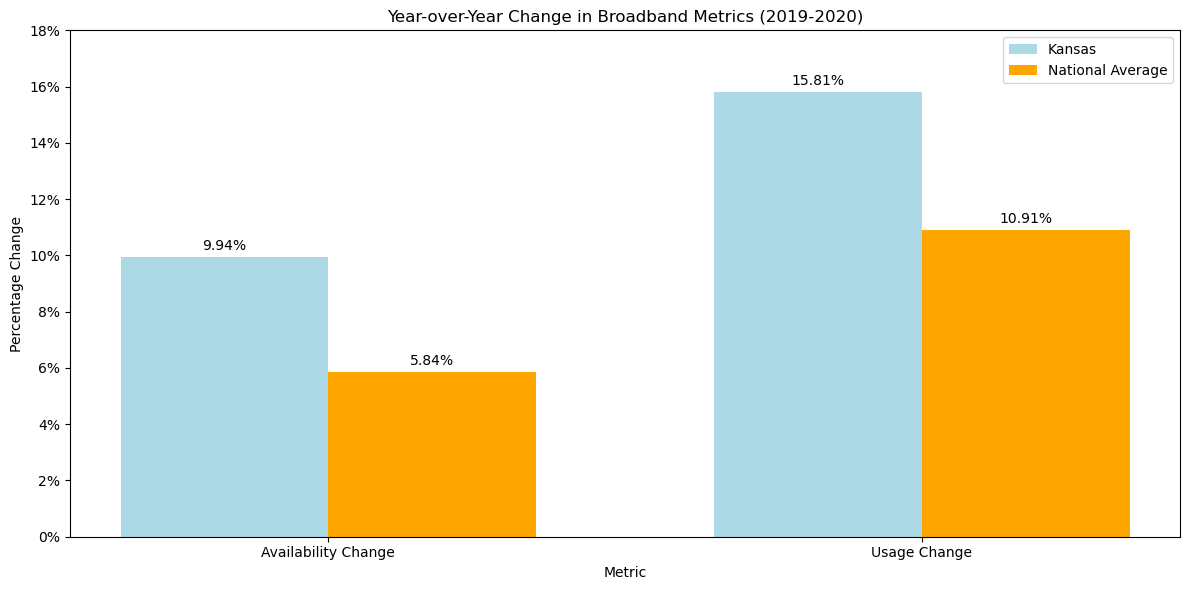

In [25]:
# Calculate the national average changes for comparison
national_average_changes = state_averages[['AVAILABILITY_CHANGE_2019_TO_2020', 'USAGE_CHANGE_2019_TO_2020']].mean()

# Preparing data for the bar chart
changes_data = pd.DataFrame({
    'Metric': ['Availability Change', 'Usage Change'],
    'Kansas': [ks_average['AVAILABILITY_CHANGE_2019_TO_2020'], ks_average['USAGE_CHANGE_2019_TO_2020']],
    'National Average': [national_average_changes['AVAILABILITY_CHANGE_2019_TO_2020'], national_average_changes['USAGE_CHANGE_2019_TO_2020']]
})

# Plotting the bar chart with data labels for clarity
fig, ax = plt.subplots(figsize=(12,6))

bar_width = 0.35
index = np.arange(len(changes_data['Metric']))

bars1 = ax.bar(index, changes_data['Kansas'], bar_width, label='Kansas', color='lightblue')
bars2 = ax.bar(index + bar_width, changes_data['National Average'], bar_width, label='National Average', color='orange')

ax.set_xlabel('Metric')
ax.set_ylabel('Percentage Change')
ax.set_title('Year-over-Year Change in Broadband Metrics (2019-2020)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(changes_data['Metric'])
ax.legend()

# Adding data labels to each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{(height*100):.2f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
plt.yticks(ticks=np.arange(0, 0.2, 0.02), labels=[f"{int(tick * 100)}%" for tick in np.arange(0, 0.2, 0.02)])
plt.tight_layout()
plt.show()


The bar chart above illustrates the year-over-year changes in broadband metrics for Kansas compared to the national average, focusing on both availability and usage changes between 2019 and 2020.

### Observations:
- **Availability Change:** Kansas shows a significant increase in broadband availability compared to the national average, highlighting effective efforts to expand broadband infrastructure within the state.
- **Usage Change:** Similarly, Kansas's increase in broadband usage outpaces the national average, indicating growing adoption rates among residents.

This visualization demonstrates Kansas's strong performance in improving both broadband access and utilization over the analyzed period, outpacing the national average in terms of growth.


/tmp/ipykernel_210880/2146658422.py:8: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



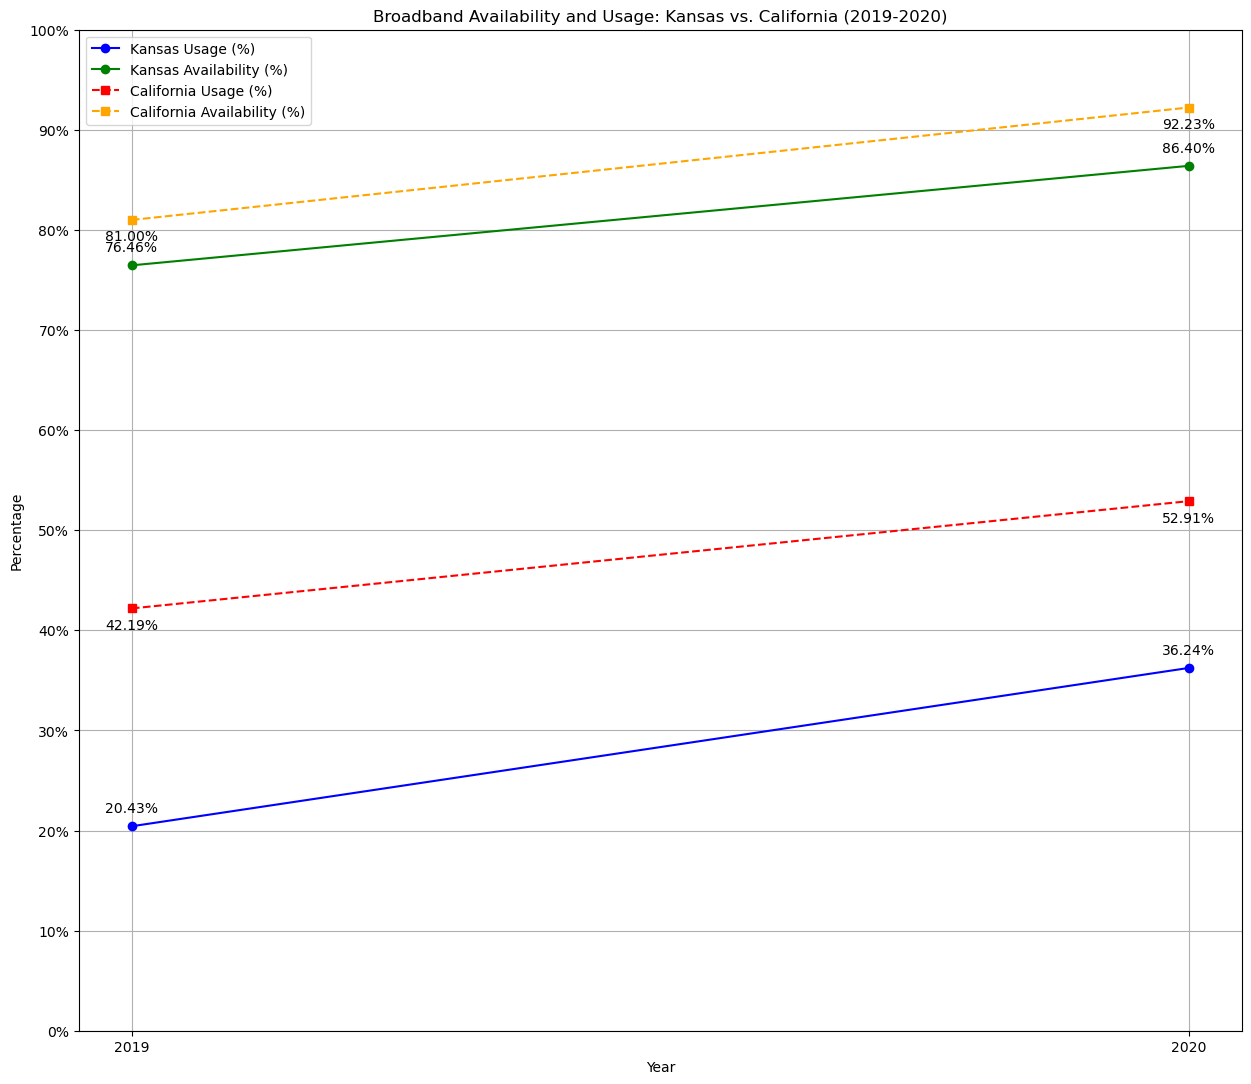

In [26]:
# Data preparation for line charts
years = ['2019', '2020']
kansas_usage = [ks_average['BROADBAND_USAGE_2019'], ks_average['BROADBAND_USAGE_2020']]
kansas_availability = [ks_average['BROADBAND_AVAILABILITY_PER_FCC_2019'], ks_average['BROADBAND_AVAILABILITY_PER_FCC_2020']]


# Extracting California's broadband data for comparison
ca_combined_data = combined_data[combined_data['ST'] == 'CA'].mean()

# Preparing the data for Kansas and California comparison
california_usage = [ca_combined_data['BROADBAND_USAGE_2019'], ca_combined_data['BROADBAND_USAGE_2020']]
california_availability = [ca_combined_data['BROADBAND_AVAILABILITY_PER_FCC_2019'], ca_combined_data['BROADBAND_AVAILABILITY_PER_FCC_2020']]

# Plotting the comparison line chart
plt.figure(figsize=(15, 13))

plt.plot(years, kansas_usage, label='Kansas Usage (%)', marker='o', linestyle='-', color='blue')
plt.plot(years, kansas_availability, label='Kansas Availability (%)', marker='o', linestyle='-', color='green')
plt.plot(years, california_usage, label='California Usage (%)', marker='s', linestyle='--', color='red')
plt.plot(years, california_availability, label='California Availability (%)', marker='s', linestyle='--', color='orange')

# Adding data labels for Kansas
for i, txt in enumerate(kansas_usage):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], kansas_usage[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(kansas_availability):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], kansas_availability[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Adding data labels for California
for i, txt in enumerate(california_usage):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], california_usage[i]), textcoords="offset points", xytext=(0,-15), ha='center')
for i, txt in enumerate(california_availability):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], california_availability[i]), textcoords="offset points", xytext=(0,-15), ha='center')


plt.title('Broadband Availability and Usage: Kansas vs. California (2019-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(years)
plt.yticks(ticks=np.arange(0, 1.1, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)])
plt.legend()
plt.grid(True)

plt.show()


The line chart compares broadband availability and usage between Kansas and California for the years 2019 and 2020. It offers a visual representation of how these two states have progressed in terms of broadband infrastructure and digital adoption over the specified period.

### Observations:
- **Broadband Usage:** Both Kansas and California show an increase in broadband usage from 2019 to 2020, with California starting from a higher baseline. This indicates a growing trend in digital adoption in both states.
- **Broadband Availability:** The availability of broadband also increased in both states, with California showing high levels of availability that exceed those in Kansas, reflecting its extensive broadband infrastructure.



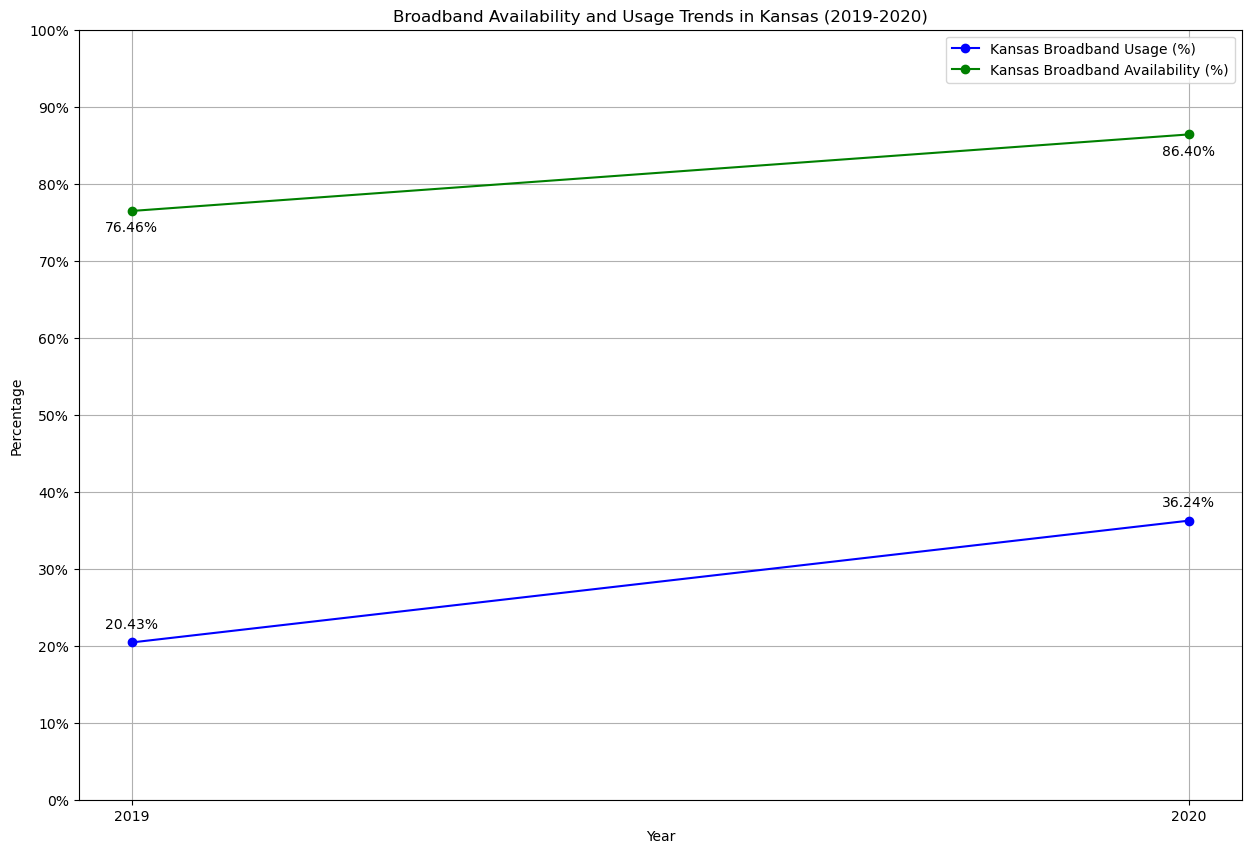

In [27]:
national_usage_average = national_average_changes['USAGE_CHANGE_2019_TO_2020'].mean()
national_availability_average = national_average_changes['AVAILABILITY_CHANGE_2019_TO_2020'].mean()


# Plotting Broadband Trends in Kansas (2019-2020) with data labels
plt.figure(figsize=(15, 10))

# Kansas Usage and Availability
plt.plot(years, kansas_usage, label='Kansas Broadband Usage (%)', marker='o', linestyle='-', color='blue')
plt.plot(years, kansas_availability, label='Kansas Broadband Availability (%)', marker='o', linestyle='-', color='green')

# Adding data labels for start and end points
for i, txt in enumerate(kansas_usage):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], kansas_usage[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(kansas_availability):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], kansas_availability[i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.title('Broadband Availability and Usage Trends in Kansas (2019-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(years)
plt.yticks(ticks=np.arange(0, 1.1, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)])
plt.legend()
plt.grid(True)

plt.show()



The line chart above visualizes the broadband availability and usage trends in Kansas for the years 2019 and 2020. It highlights the notable increase in both broadband availability and usage over the period, reflecting the state's progress in enhancing digital access.


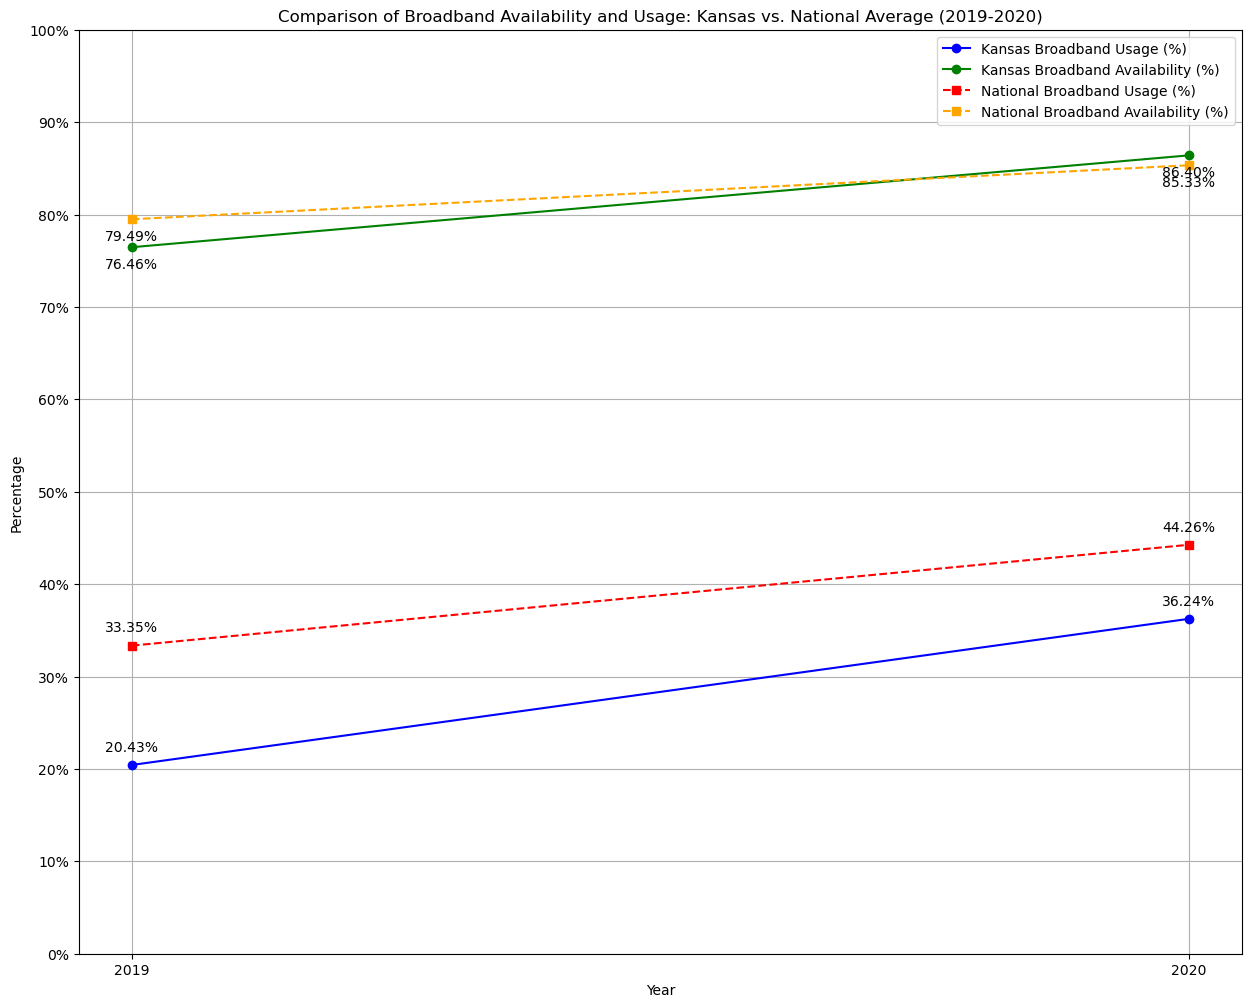

In [28]:
# Since we calculated changes earlier, we need to reconstruct the national averages for 2019 and 2020 directly for comparison
national_usage_2019 = state_averages['BROADBAND_USAGE_2019'].mean()
national_usage_2020 = state_averages['BROADBAND_USAGE_2020'].mean()
national_availability_2019 = state_averages['BROADBAND_AVAILABILITY_PER_FCC_2019'].mean()
national_availability_2020 = state_averages['BROADBAND_AVAILABILITY_PER_FCC_2020'].mean()

# Plotting the comparison between Kansas and the national average with data labels for 2019 and 2020
plt.figure(figsize=(15, 12))

# Plotting Kansas and National Average Trends
plt.plot(years, kansas_usage, label='Kansas Broadband Usage (%)', marker='o', linestyle='-', color='blue')
plt.plot(years, kansas_availability, label='Kansas Broadband Availability (%)', marker='o', linestyle='-', color='green')
plt.plot(years, [national_usage_2019, national_usage_2020], label='National Broadband Usage (%)', marker='s', linestyle='--', color='red')
plt.plot(years, [national_availability_2019, national_availability_2020], label='National Broadband Availability (%)', marker='s', linestyle='--', color='orange')

# Adding data labels for Kansas
for i, txt in enumerate(kansas_usage):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], kansas_usage[i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(kansas_availability):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], kansas_availability[i]), textcoords="offset points", xytext=(0,-15), ha='center')

# Adding data labels for National Average
for i, txt in enumerate([national_usage_2019, national_usage_2020]):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], [national_usage_2019, national_usage_2020][i]), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate([national_availability_2019, national_availability_2020]):
    plt.annotate(f"{(txt*100):.2f}%", (years[i], [national_availability_2019, national_availability_2020][i]), textcoords="offset points", xytext=(0,-15), ha='center')

plt.title('Comparison of Broadband Availability and Usage: Kansas vs. National Average (2019-2020)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(years)
plt.yticks(ticks=np.arange(0, 1.1, 0.1), labels=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)])
plt.legend()
plt.grid(True)

plt.show()



The line chart above compares broadband availability and usage trends between Kansas and the national average for 2019 and 2020. It distinguishes Kansas's progress with solid lines against the national trends depicted with dashed lines.

### Observations:
- **Broadband Usage:** Kansas's increase in broadband usage is notably sharp compared to the national average, suggesting effective strategies or investments in digital adoption within the state.
- **Broadband Availability:** Similarly, Kansas shows a significant increase in broadband availability, outpacing the national average growth. This reflects successful initiatives to expand broadband infrastructure.

This visualization underscores Kansas's achievements in enhancing broadband access and adoption relative to national trends, highlighting the effectiveness of its broadband development programs.

In [29]:


# Merging the datasets on state (ST) and county ID (COUNTY_ID)
broadband_data_merged = pd.merge(broadband_data_zipcode, combined_data, on=['ST', 'COUNTY_ID'], how='left')

# Displaying the first few rows of the merged dataset to confirm successful merge
broadband_data_merged.head()




ST COUNTY_NAME  COUNTY_ID  POSTAL_CODE  BROADBAND_USAGE  \
0  SC   Abbeville      45001        29639            0.948   
1  SC   Abbeville      45001        29620            0.398   
2  SC   Abbeville      45001        29659            0.206   
3  SC   Abbeville      45001        29638            0.369   
4  SC   Abbeville      45001        29628            0.221   

   ERROR_RANGE_(MAE)(+/-)  ERROR_RANGE_(95%)(+/-)    MSD  \
0                   0.034                   0.110  0.002   
1                   0.002                   0.007  0.000   
2                   0.152                   0.608  0.043   
3                   0.010                   0.031 -0.001   
4                   0.014                   0.043  0.000   

   BROADBAND_AVAILABILITY_PER_FCC_2019  BROADBAND_USAGE_2019  \
0                                 0.95                   0.3   
1                                 0.95                   0.3   
2                                 0.95                   0.3   
3                                 0.95                   0.3   
4                                 0.95                   0.3   

   BROADBAND_AVAILABILITY_PER_FCC_2020  BROADBAND_USAGE_2020  
0                               0.9614                 0.399  
1                               0.9614                 0.399  
2                               0.9614                 0.399  
3                               0.9614                 0.399  
4                               0.9614                 0.399

In [30]:
broadband_data_merged

ST COUNTY_NAME  COUNTY_ID  POSTAL_CODE  BROADBAND_USAGE  \
0      SC   Abbeville      45001        29639            0.948   
1      SC   Abbeville      45001        29620            0.398   
2      SC   Abbeville      45001        29659            0.206   
3      SC   Abbeville      45001        29638            0.369   
4      SC   Abbeville      45001        29628            0.221   
...    ..         ...        ...          ...              ...   
32730  TX      Zavala      48507        78839            0.514   
32731  TX      Zavala      48507        78872            0.071   
32732  SD     Ziebach      46137        57622            0.000   
32733  SD     Ziebach      46137        57748            0.000   
32734  SD     Ziebach      46137        57623            0.299   

       ERROR_RANGE_(MAE)(+/-)  ERROR_RANGE_(95%)(+/-)    MSD  \
0                       0.034                   0.110  0.002   
1                       0.002                   0.007  0.000   
2                       0.152                   0.608  0.043   
3                       0.010                   0.031 -0.001   
4                       0.014                   0.043  0.000   
...                       ...                     ...    ...   
32730                   0.006                   0.018 -0.001   
32731                   0.020                   0.061  0.000   
32732                   0.110                   0.406  0.031   
32733                   0.065                   0.228  0.013   
32734                   0.034                   0.110  0.002   

       BROADBAND_AVAILABILITY_PER_FCC_2019  BROADBAND_USAGE_2019  \
0                                     0.95                  0.30   
1                                     0.95                  0.30   
2                                     0.95                  0.30   
3                                     0.95                  0.30   
4                                     0.95                  0.30   
...                                    ...                   ...   
32730                                 0.70                  0.11   
32731                                 0.70                  0.11   
32732                                 0.98                  0.09   
32733                                 0.98                  0.09   
32734                                 0.98                  0.09   

       BROADBAND_AVAILABILITY_PER_FCC_2020  BROADBAND_USAGE_2020  
0                                   0.9614                 0.399  
1                                   0.9614                 0.399  
2                                   0.9614                 0.399  
3                                   0.9614                 0.399  
4                                   0.9614                 0.399  
...                                    ...                   ...  
32730                               0.8035                 0.394  
32731                               0.8035                 0.394  
32732                               1.0000                 0.175  
32733                               1.0000                 0.175  
32734                               1.0000                 0.175  

[32735 rows x 12 columns]

In [31]:
combined_data

ST  COUNTY_ID  BROADBAND_AVAILABILITY_PER_FCC_2019  \
0     AL       1001                                 0.81   
1     AL       1003                                 0.88   
2     AL       1005                                 0.59   
3     AL       1007                                 0.29   
4     AL       1009                                 0.69   
...   ..        ...                                  ...   
3135  WY      56037                                 0.93   
3136  WY      56039                                 0.94   
3137  WY      56041                                 0.66   
3138  WY      56043                                 0.76   
3139  WY      56045                                 0.34   

      BROADBAND_USAGE_2019  BROADBAND_AVAILABILITY_PER_FCC_2020  \
0                     0.28                               0.8057   
1                     0.30                               0.8362   
2                     0.18                               0.6891   
3                     0.07                               0.3368   
4                     0.09                               0.7580   
...                    ...                                  ...   
3135                  0.24                               0.9422   
3136                  0.48                               0.9508   
3137                  0.21                               0.9963   
3138                  0.37                               0.8903   
3139                  0.09                               0.8937   

      BROADBAND_USAGE_2020  
0                    0.391  
1                    0.452  
2                    0.324  
3                    0.136  
4                    0.199  
...                    ...  
3135                 0.400  
3136                 0.623  
3137                 0.431  
3138                 0.571  
3139                 0.152  

[3140 rows x 6 columns]

In [32]:
broadband_data_merged.isnull().sum()

ST                                      0
COUNTY_NAME                             0
COUNTY_ID                               0
POSTAL_CODE                             0
BROADBAND_USAGE                         0
ERROR_RANGE_(MAE)(+/-)                  0
ERROR_RANGE_(95%)(+/-)                  0
MSD                                     0
BROADBAND_AVAILABILITY_PER_FCC_2019    28
BROADBAND_USAGE_2019                   28
BROADBAND_AVAILABILITY_PER_FCC_2020    28
BROADBAND_USAGE_2020                   28
dtype: int64

In [33]:
broadband_data_merged.duplicated().sum()

0

In [34]:
broadband_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32735 entries, 0 to 32734
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ST                                   32735 non-null  object 
 1   COUNTY_NAME                          32735 non-null  object 
 2   COUNTY_ID                            32735 non-null  int64  
 3   POSTAL_CODE                          32735 non-null  int64  
 4   BROADBAND_USAGE                      32735 non-null  float64
 5   ERROR_RANGE_(MAE)(+/-)               32735 non-null  float64
 6   ERROR_RANGE_(95%)(+/-)               32735 non-null  float64
 7   MSD                                  32735 non-null  float64
 8   BROADBAND_AVAILABILITY_PER_FCC_2019  32707 non-null  float64
 9   BROADBAND_USAGE_2019                 32707 non-null  float64
 10  BROADBAND_AVAILABILITY_PER_FCC_2020  32707 non-null  float64
 11  BROADBAND_USAGE_2020        

In [35]:
# Calculate the average values for each column
avg_availability_2019 = broadband_data_merged['BROADBAND_AVAILABILITY_PER_FCC_2019'].mean()
avg_usage_2019 = broadband_data_merged['BROADBAND_USAGE_2019'].mean()
avg_availability_2020 = broadband_data_merged['BROADBAND_AVAILABILITY_PER_FCC_2020'].mean()
avg_usage_2020 = broadband_data_merged['BROADBAND_USAGE_2020'].mean()

# Fill null values with average values
broadband_data_merged['BROADBAND_AVAILABILITY_PER_FCC_2019'].fillna(avg_availability_2019, inplace=True)
broadband_data_merged['BROADBAND_USAGE_2019'].fillna(avg_usage_2019, inplace=True)
broadband_data_merged['BROADBAND_AVAILABILITY_PER_FCC_2020'].fillna(avg_availability_2020, inplace=True)
broadband_data_merged['BROADBAND_USAGE_2020'].fillna(avg_usage_2020, inplace=True)


In [36]:
broadband_data_merged.isnull().sum()

ST                                     0
COUNTY_NAME                            0
COUNTY_ID                              0
POSTAL_CODE                            0
BROADBAND_USAGE                        0
ERROR_RANGE_(MAE)(+/-)                 0
ERROR_RANGE_(95%)(+/-)                 0
MSD                                    0
BROADBAND_AVAILABILITY_PER_FCC_2019    0
BROADBAND_USAGE_2019                   0
BROADBAND_AVAILABILITY_PER_FCC_2020    0
BROADBAND_USAGE_2020                   0
dtype: int64

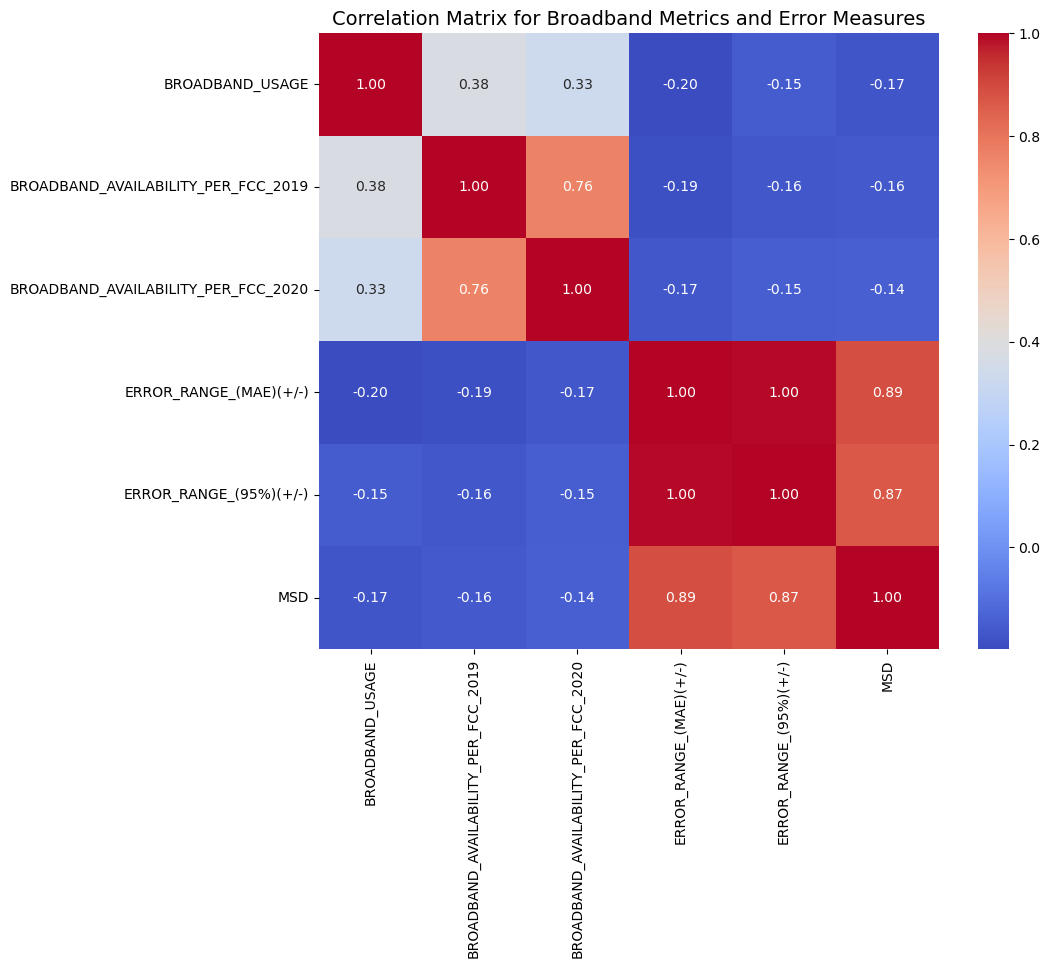

In [37]:
# Calculate the correlation matrix to explore the relationships
correlation_matrix = broadband_data_merged[['BROADBAND_USAGE', 'BROADBAND_AVAILABILITY_PER_FCC_2019', 'BROADBAND_AVAILABILITY_PER_FCC_2020', 'ERROR_RANGE_(MAE)(+/-)', 'ERROR_RANGE_(95%)(+/-)', 'MSD']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Broadband Metrics and Error Measures', fontsize=14)
plt.show()


The heatmap displays the correlation matrix for broadband metrics alongside error measures (`ERROR_RANGE_(MAE)(+/-)`, `ERROR_RANGE_(95%)(+/-)`, and `MSD`) for the dataset:

### Key Insights:
- **Broadband Usage Correlations**: The correlation between broadband usage and the error measures is relatively low. This suggests that the variability or accuracy of broadband usage data does not significantly change with the level of broadband usage.
- **Broadband Availability Correlations**: Similar to broadband usage, broadband availability for 2019 and 2020 shows low to moderate correlation with error measures. This indicates that the availability figures' accuracy or variability is somewhat consistent across different levels of broadband availability.
- **Error Measures Inter-correlation**: The two error ranges (`ERROR_RANGE_(MAE)(+/-)` and `ERROR_RANGE_(95%)(+/-)`) show a very high correlation with each other, as expected since they are both measures of error but calculated differently. The correlation of these with `MSD` is lower, suggesting that while all these measures relate to variability or error, they capture slightly different aspects.

### Conclusion:
The analysis indicates that the error measures and variability indicators (MAE, 95% error range, and MSD) are relatively independent of the broadband usage and availability metrics. This could imply that the data's reliability or uncertainty does not directly increase or decrease with broadband metrics across the dataset.


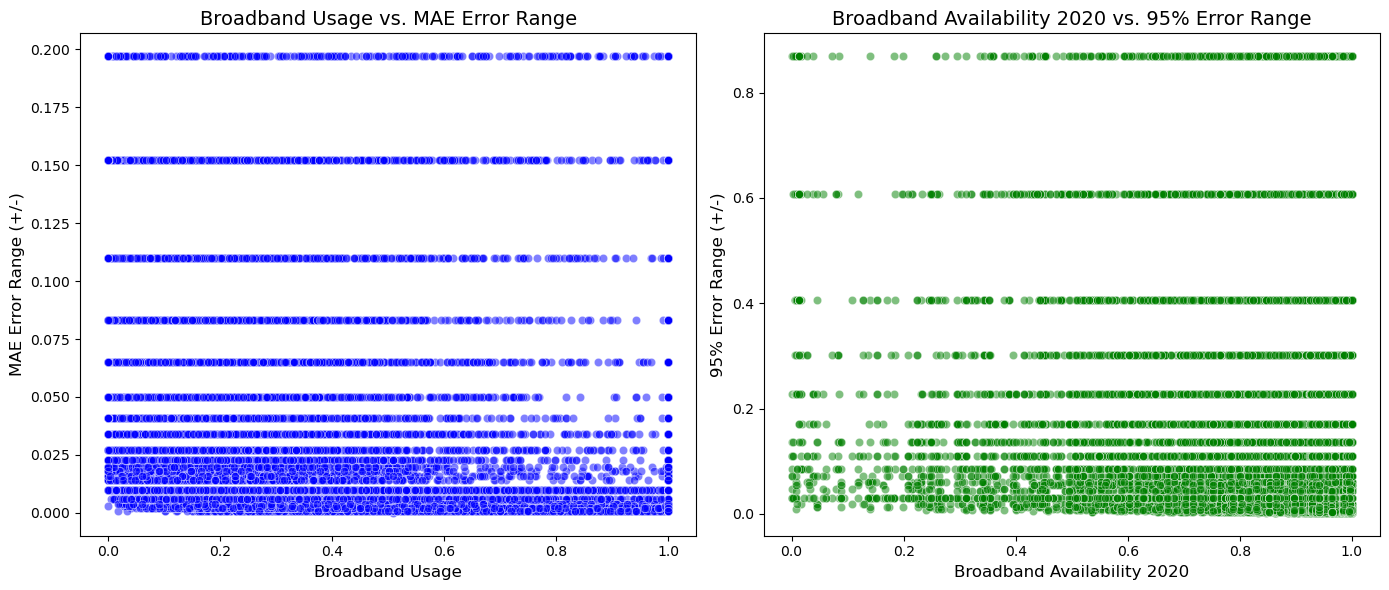

In [38]:
# Scatter plot to explore the relationship between Broadband Usage and ERROR_RANGE_(MAE)(+/-)
plt.figure(figsize=(14, 6))

# Broadband Usage vs. ERROR_RANGE_(MAE)(+/-)
plt.subplot(1, 2, 1)
sns.scatterplot(x='BROADBAND_USAGE', y='ERROR_RANGE_(MAE)(+/-)', data=broadband_data_merged, color='blue', alpha=0.5)
plt.title('Broadband Usage vs. MAE Error Range', fontsize=14)
plt.xlabel('Broadband Usage', fontsize=12)
plt.ylabel('MAE Error Range (+/-)', fontsize=12)

# Broadband Availability 2020 vs. ERROR_RANGE_(95%)(+/-)
plt.subplot(1, 2, 2)
sns.scatterplot(x='BROADBAND_AVAILABILITY_PER_FCC_2020', y='ERROR_RANGE_(95%)(+/-)', data=broadband_data_merged, color='green', alpha=0.5)
plt.title('Broadband Availability 2020 vs. 95% Error Range', fontsize=14)
plt.xlabel('Broadband Availability 2020', fontsize=12)
plt.ylabel('95% Error Range (+/-)', fontsize=12)

plt.tight_layout()
plt.show()


The scatter plots provide a visual exploration of the relationship between broadband metrics and error ranges:

- **Broadband Usage vs. MAE Error Range**: This plot does not show a strong or clear relationship between broadband usage and the mean absolute error (MAE) range. The data points are spread across the plot, indicating variability in the MAE error range that does not directly correlate with the level of broadband usage.

- **Broadband Availability 2020 vs. 95% Error Range**: Similar to the MAE error range, the 95% error range does not display a strong or consistent relationship with broadband availability in 2020. The spread of data points suggests that the confidence interval's width (95% error range) is relatively independent of the availability rate.

### Insights:
- Both error measures (MAE and 95% error range) show a spread of values across different levels of broadband usage and availability, reinforcing the earlier correlation analysis conclusion that these error metrics do not strongly correlate with broadband metrics.
- This lack of a strong relationship suggests that errors and uncertainties in the data are influenced by factors other than just the broadband usage or availability rates, possibly including the data collection methods, sample sizes, and regional variations.


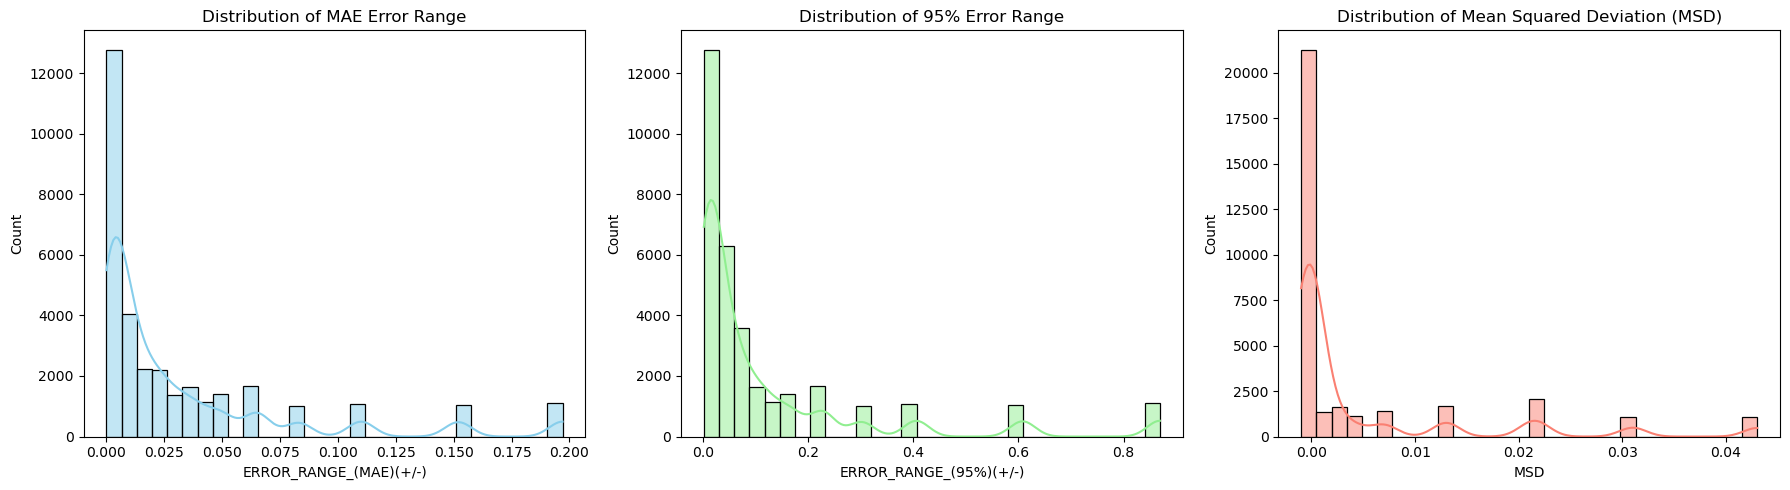

In [39]:
# Setting up the figure for distribution plots
plt.figure(figsize=(18, 5))

# Distribution of ERROR_RANGE_(MAE)(+/-)
plt.subplot(1, 3, 1)
sns.histplot(broadband_data_merged['ERROR_RANGE_(MAE)(+/-)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of MAE Error Range')

# Distribution of ERROR_RANGE_(95%)(+/-)
plt.subplot(1, 3, 2)
sns.histplot(broadband_data_merged['ERROR_RANGE_(95%)(+/-)'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of 95% Error Range')

# Distribution of MSD
plt.subplot(1, 3, 3)
sns.histplot(broadband_data_merged['MSD'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Mean Squared Deviation (MSD)')

plt.tight_layout()
plt.show()


The distribution plots for each of the error measures (`ERROR_RANGE_(MAE)(+/-)`, `ERROR_RANGE_(95%)(+/-)`, `MSD`) provide insights into their commonality and variability within the dataset:

- **MAE Error Range**: The distribution of the Mean Absolute Error (MAE) range shows a concentration of values towards the lower end, indicating that for many observations, the absolute error is relatively small. However, there's a long tail suggesting that some areas or data points have significantly higher errors.
  
- **95% Error Range**: Similar to the MAE Error Range, the 95% Error Range also shows a skewed distribution with a concentration of smaller error values and a long tail towards higher errors. This indicates that while most data points have a smaller confidence interval width, a few points have much wider intervals, suggesting greater uncertainty.
  
- **MSD (Mean Squared Deviation)**: The distribution of MSD values shows variability, with a focus towards lower values but also with a presence of outliers or a long tail towards higher values. This indicates variance in the squared deviations across the dataset, suggesting differences in error magnitudes.

### Insights:
- The presence of long tails in all three distributions suggests that while a large portion of the dataset has relatively low error measures, there are notable exceptions with significantly higher errors. These could be due to outliers, variations in data collection accuracy, or inherent challenges in measuring broadband metrics in certain areas.
  
- The skewed distributions underscore the importance of understanding and addressing the sources of high errors or deviations, as these can impact the reliability of broadband data and, consequently, the formulation of policies and strategies.


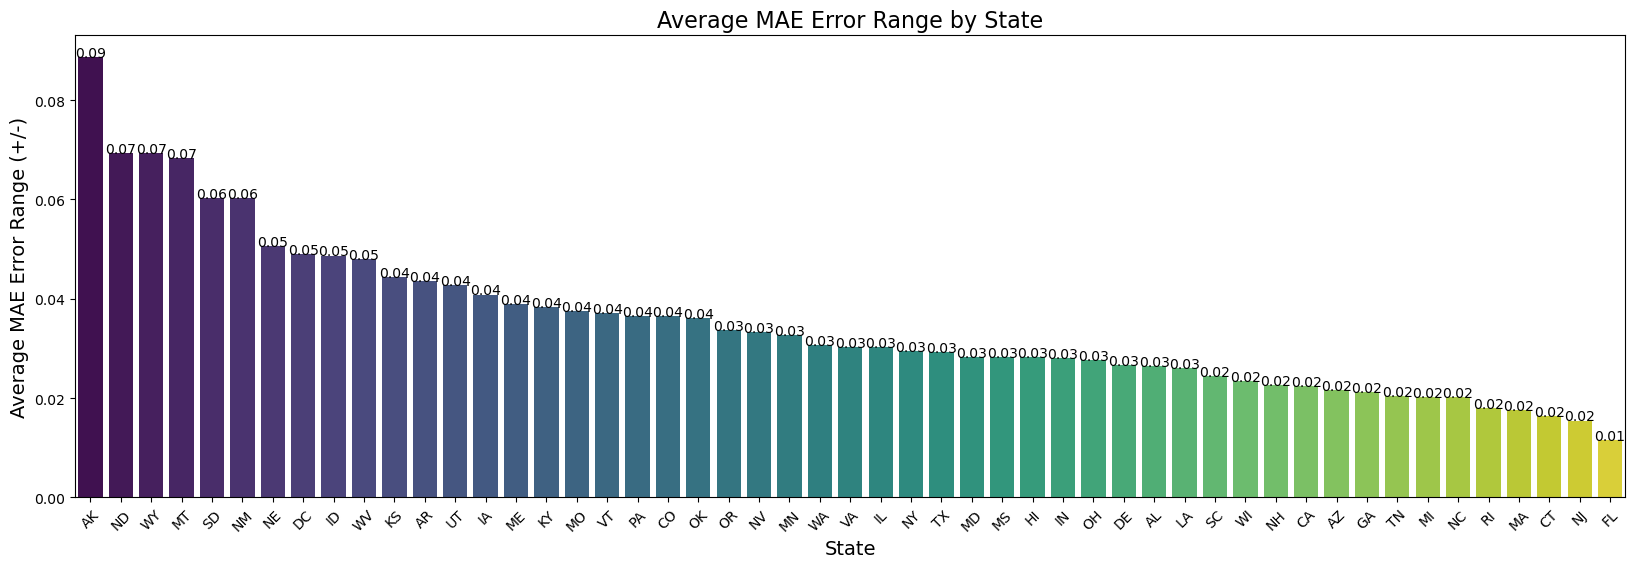

In [40]:
# Aggregating the ERROR_RANGE_(MAE)(+/-) at the state level to calculate average high error measures
state_error_mae_avg = broadband_data_merged.groupby('ST')['ERROR_RANGE_(MAE)(+/-)'].mean().sort_values(ascending=False)

# Resetting index to make 'ST' a column for visualization purposes
state_error_mae_avg_reset = state_error_mae_avg.reset_index()

# Visualizing the average MAE Error Range for each state as a heatmap
plt.figure(figsize=(20, 6))
heatmap = sns.barplot(x='ST', y='ERROR_RANGE_(MAE)(+/-)', data=state_error_mae_avg_reset, palette='viridis')
plt.title('Average MAE Error Range by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average MAE Error Range (+/-)', fontsize=14)

# Adding data labels
for index, row in state_error_mae_avg_reset.iterrows():
    heatmap.text(index, row['ERROR_RANGE_(MAE)(+/-)'], round(row['ERROR_RANGE_(MAE)(+/-)'], 2), color='black', ha="center")


# Rotating the x labels for better readability
plt.xticks(rotation=45)

plt.show()


The heatmap visualizes the average Mean Absolute Error (MAE) Error Range by state, providing a clear indication of which states have higher average error measures in their broadband data. States on the left side of the heatmap, with darker colors, have higher average MAE error ranges, suggesting potential challenges in data accuracy or variability in these regions.

### Insights:
- This visualization highlights geographic variations in the reliability of broadband data across different states. States with higher average error measures may require closer examination to understand the reasons behind these errors, which could include factors like rural geography, lower population density, or challenges in data collection.
- Identifying states with higher error measures can help prioritize areas for further investigation, potential improvements in data collection methodologies, and targeted actions to enhance broadband infrastructure and access.


## Dashboard

In [41]:
import plotly.express as px
import plotly.graph_objs as go

# First, let's aggregate the data at the state level
state_data = combined_data.groupby('ST').mean().reset_index()

# Now let's create the pie chart for average broadband usage by state for 2019
fig_pie_usage = px.pie(state_data, values='BROADBAND_USAGE_2019', names='ST', title='2019 Average Broadband Usage by ST')

# Next, the donut chart for average broadband availability by state for 2019
fig_donut_availability = px.pie(state_data, values='BROADBAND_AVAILABILITY_PER_FCC_2019', names='ST', hole=0.3, 
                                title='2019 Average Broadband Availability PER FCC by ST')

# Now the bar chart for average broadband usage by state for 2019
state_data_sorted = state_data.sort_values(by = 'BROADBAND_USAGE_2019', ascending=False).reset_index()
fig_bar_usage = px.bar(state_data_sorted, x='ST', y='BROADBAND_USAGE_2019', color='ST',color_continuous_scale='Viridis', title='Average Broadband Usage 2019 by ST')

# And finally, the gauge chart. Since we're using pie chart to simulate a gauge, we'll create a total average value for usage and availability
average_usage = state_data['BROADBAND_USAGE_2019'].mean()
average_availability = state_data['BROADBAND_AVAILABILITY_PER_FCC_2019'].mean()


# Creating the figure
fig = go.Figure()

# Plotting all states
fig_scatter=fig.add_trace(go.Scatter(
    x=state_averages['BROADBAND_AVAILABILITY_PER_FCC_2019'],
    y=state_averages['BROADBAND_USAGE_2019'],
    mode='markers',
    marker=dict(color='gray', opacity=0.6),
    name='Other States'
))

# Highlighting Kansas
fig_scatter=fig.add_trace(go.Scatter(
    x=[ks_average['BROADBAND_AVAILABILITY_PER_FCC_2019']],
    y=[ks_average['BROADBAND_USAGE_2019']],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Kansas'
))

# Adding layout details
fig_scatter=fig.update_layout(
    title='State Comparison of Broadband Availability vs. Usage (2019)',
    xaxis_title='Broadband Availability (%)',
    yaxis_title='Broadband Usage (%)',
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(0.5, 1.01, 0.1),
        ticktext=[f"{int(tick * 100)}%" for tick in np.arange(0.5, 1.01, 0.1)]
    ),
    yaxis=dict(
        tickmode='array',
        tickvals=np.arange(0, 1.1, 0.1),
        ticktext=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)]
    )
)





# For gauge chart, we're using a bar chart to simulate it since Plotly doesn't have a built-in gauge type
fig_gauge_usage = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_usage,
    title={'text': "Average Broadband Usage 2019"},
    domain={'x': [0, 1], 'y': [0, 1]},
    gauge={
        'axis': {'range': [None, 1]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 0.5], 'color': "lightgray"},
            {'range': [0.5, 1], 'color': "gray"}
        ],
    }
))


fig_gauge_availability = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_availability,
    title={'text': "Average Broadband Availability 2019"},
    domain={'x': [0, 1], 'y': [0, 1]},
    gauge={
        'axis': {'range': [None, 1]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 0.5], 'color': "lightgray"},
            {'range': [0.5, 1], 'color': "gray"}
        ],
    }
))


#'state_data' is a DataFrame with a 'ST' column for state codes and 'BROADBAND_USAGE_2019' for the data to plot
fig_map_usage = px.choropleth(
    state_data,  # DataFrame containing your data
    locations='ST',  # column in the DataFrame with state codes
    color='BROADBAND_USAGE_2019',  
    hover_name='ST',  # column to display in the hover tooltip
    locationmode='USA-states',  # set the mode to USA states
    color_continuous_scale='OrRd',  # set the color scale
    scope='usa',  # scope to USA for the map
    title='Average Broadband Usage by State (2019)'  # title of the map
)


#Plot all the figures
fig_pie_usage.show()
fig_donut_availability.show()
fig_bar_usage.show()
fig_scatter.show()
fig_gauge_usage.show()
fig_gauge_availability.show()
fig_map_usage.show()


In [42]:
import plotly
import plotly.express as px
import plotly.graph_objs as go

# First, let's aggregate the data at the state level
state_data = combined_data.groupby('ST').mean().reset_index()

# Now let's create the pie chart for average broadband usage by state for 2020
state_data_sorted = state_data.sort_values(by = 'BROADBAND_USAGE_2020', ascending=False).reset_index()
fig_pie_usage = px.pie(state_data, values='BROADBAND_USAGE_2020', names='ST',color_discrete_sequence=px.colors.qualitative.Dark24, title='2020 Average Broadband Usage 2020 by ST')

# Next, the donut chart for average broadband availability by state for 2020
fig_donut_availability = px.pie(state_data, values='BROADBAND_AVAILABILITY_PER_FCC_2020', names='ST', hole=0.3, 
                                title='2020 Average Broadband Availability PER FCC by ST')

# Now the bar chart for average broadband usage by state for 2020
fig_bar_usage = px.bar(state_data_sorted, x='ST', y='BROADBAND_USAGE_2020',color='ST',color_continuous_scale='Viridis', title='Average Broadband Usage by ST')

# And finally, the gauge chart. Since we're using pie chart to simulate a gauge, we'll create a total average value for usage and availability
average_usage = state_data['BROADBAND_USAGE_2020'].mean()
average_availability = state_data['BROADBAND_AVAILABILITY_PER_FCC_2020'].mean()

import plotly.graph_objects as go

# Creating the figure
fig = go.Figure()

# Plotting all states
fig_scatter=fig.add_trace(go.Scatter(
    x=state_averages['BROADBAND_AVAILABILITY_PER_FCC_2020'],
    y=state_averages['BROADBAND_USAGE_2020'],
    mode='markers',
    marker=dict(color='gray', opacity=0.6),
    name='Other States'
))

# Highlighting Kansas
fig_scatter=fig.add_trace(go.Scatter(
    x=[ks_average['BROADBAND_AVAILABILITY_PER_FCC_2020']],
    y=[ks_average['BROADBAND_USAGE_2020']],
    mode='markers',
    marker=dict(color='red', size=10),
    name='Kansas'
))

# Adding layout details
fig_scatter=fig.update_layout(
    title='State Comparison of Broadband Availability vs. Usage (2020)',
    xaxis_title='Broadband Availability (%)',
    yaxis_title='Broadband Usage (%)',
    xaxis=dict(
        tickmode='array',
        tickvals=np.arange(0.5, 1.01, 0.1),
        ticktext=[f"{int(tick * 100)}%" for tick in np.arange(0.5, 1.01, 0.1)]
    ),
    yaxis=dict(
        tickmode='array',
        tickvals=np.arange(0, 1.1, 0.1),
        ticktext=[f"{int(tick * 100)}%" for tick in np.arange(0, 1.1, 0.1)]
    )
)




# For gauge chart, we're using a bar chart to simulate it since Plotly doesn't have a built-in gauge type
fig_gauge_usage = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_usage,
    title={'text': "Average Broadband Usage 2020"},
    domain={'x': [0, 1], 'y': [0, 1]},
    gauge={
        'axis': {'range': [None, 1]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 0.5], 'color': "lightgray"},
            {'range': [0.5, 1], 'color': "gray"}
        ],
    }
))



fig_gauge_availability = go.Figure(go.Indicator(
    mode="gauge+number",
    value=average_availability,
    title={'text': "Average Broadband Availability 2020"},
    domain={'x': [0, 1], 'y': [0, 1]},
    gauge={
        'axis': {'range': [None, 1]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 0.5], 'color': "lightgray"},
            {'range': [0.5, 1], 'color': "gray"}
        ],
    }
))


#'state_data' is a DataFrame with a 'ST' column for state codes and 'BROADBAND_AVAILABILITY' for the data to plot
fig_map_usage = px.choropleth(
    state_data,  # DataFrame containing your data
    locations='ST',  # column in the DataFrame with state codes
    color='BROADBAND_USAGE_2020',  
    hover_name='ST',  # column to display in the hover tooltip
    locationmode='USA-states',  # set the mode to USA states
    color_continuous_scale='OrRd',  # set the color scale
    scope='usa',  # scope to USA for the map
    title='Average Broadband Usage by State (2020)'  # title of the map
)


# Plot all the figures
fig_pie_usage.show()
fig_donut_availability.show()
fig_bar_usage.show()
fig_scatter.show()
fig_gauge_usage.show()
fig_gauge_availability.show()
fig_map_usage.show()

In [43]:
# Distribution plots using Plotly Express
fig_dist_mae = px.histogram(broadband_data_merged, x='ERROR_RANGE_(MAE)(+/-)', nbins=30, title='Distribution of MAE Error Range')
fig_dist_95 = px.histogram(broadband_data_merged, x='ERROR_RANGE_(95%)(+/-)', nbins=30, title='Distribution of 95% Error Range')
fig_dist_msd = px.histogram(broadband_data_merged, x='MSD', nbins=30, title='Distribution of Mean Squared Deviation (MSD)')

fig_dist_mae.update_traces(marker_color='skyblue', marker_line_color='black', marker_line_width=1.5)
fig_dist_95.update_traces(marker_color='lightgreen', marker_line_color='black', marker_line_width=1.5)
fig_dist_msd.update_traces(marker_color='salmon', marker_line_color='black', marker_line_width=1.5)

# Aggregating the ERROR_RANGE_(MAE)(+/-) at the state level
state_error_mae_avg = broadband_data_merged.groupby('ST')['ERROR_RANGE_(MAE)(+/-)'].mean().sort_values(ascending=False).reset_index()

fig_heatmap = px.bar(
    state_error_mae_avg,
    x='ST',
    y='ERROR_RANGE_(MAE)(+/-)',
    color='ST', # Setting a single color for all bars
    color_continuous_scale=px.colors.sequential.Viridis,
    #text=state_error_mae_avg['ERROR_RANGE_(MAE)(+/-)'], # Adding text on bars
    #textposition='outside', # Positioning the text
    title='Average MAE Error Range by State',
)



fig_heatmap.show()
fig_dist_mae.show()
fig_dist_95.show()
fig_dist_msd.show()